<a href="https://colab.research.google.com/github/pedrobslima/redes_neurais/blob/main/STab_TabKANet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Projeto MLP-CNN
## Centro de Informática da UFPE
### IF702 - Redes Neurais
### Germano Crispim Vasconcelos

14/04/2025

Grupo:
1. Pedro Lima (pbsl@cin.ufpe.br)
2. Pedro de Souza (pbsl@cin.ufpe.br)
3. Pedro Barros (pbsl@cin.ufpe.br)


- Conjunto de classificadores disponíveis:
    - Perceptron multicamadas (MLP)
    - Kolmogorov Arnold Networks (KANs).
    - Modelo Baseado em Transformer (STab) 2024 (em preparação)
    - KAN Transformer (TabKANet) 2024 (em preparação)
    - Random Forest (usado para comparação)
    - Gradient Boosting (usado para comparação)

- Investigar diferentes topologias da rede e diferentes valores
    dos parâmetros (básico):
    - Número de camadas
    - Número de unidades intermediárias
    - Variação da taxa de aprendizagem
    - Função de ativação (logistica, tangent hiperbolica, Relu)
    - Otimização: Adam, Drop-out, Regularização
    - Usar método de amostragem básica (repetitive oversampling)

- Parâmetros adicionais que podem ser explorados:
    - Algoritmo de aprendizagem
    - Taxa de aprendizagem adaptativa
    - Outros

### Preparação de dados (divisão e balanceamento)
- Conjuntos de dados
- Treinamento
    - Validação (separar amostra do Treinamento)
    - Teste (separar amostra do Treinamento)
- Estatisticamente representativos e independentes
    - Nenhuma informação do conjunto de teste pode interferir nos conjuntos de treinamento e validação (ex: identificação do mínimo e máximo para normalização). (vazamento de dados)
    - Não pode haver sobreposição (contaminação)

### Avaliação de Desempenho
- Classificação
    - Teste estatístico Kolmogorov-Smirnov
        - KS (principal)
        - MSE (erro médio quadrado)
    - Matriz de confusão
    - Auroc (Área sob a Curva Roc)
    - Recall, Precision e F-Measure

### Experimentos
- Pré-processamento da base de dados
    - Tratamento de dados ausentes, se houver (missing data)
    - Remoção de ruídos (outliers), se houver
    - Remoção de inconsistências, se houver
    - Normalização
    - Codificação
    - Transformação de variáveis
    - Criação de variáveis agregadas
- Importante
    - Registrar o desempenho de forma evolutiva, a cada etapa. Não
    elimine váriáveis no primeiro modelo (a não ser identificadores)

- Recomendação:
    - Iniciar com um modelo MLP e um modelo
    Random Forest
    - Após bom desempenho com esses modelos,
    experimentar os demais
    - KANs, Transformer (tentativo), KAN
    Transformer (tentativo)
    - Gradient boosting.

### Ferramentas para o projeto

- Código em Python
    - https://github.com/RomeroBarata/IF702-redes-neurais

- Pode usar qualquer biblioteca, preocupando-se apenas de garantir que está executando corretamente os experimentos e análise de performance (exemplo, usar função do KS que meça corretamente os valores, comparar com os gráficos dos slides neste ppt)
- Conjuntos de dados do problema
    - Arquivo obtido do Kaggle

### Lições aprendidas

- Comece com uma rede pequena: 1 camada, 10 unidades (a melhor rede é a menor rede que resolve bem o problema: navalha de Occam)
- Definir numero de epocas maximo em 10mil! Usar o critério de parada baseado no Patience (Max Fail = 20)
- Taxas de aprendizagem menores requerem mais tempo mas tendem a gerar melhores resultados
- Fazer backup automático
- Começar cedo, se deixar para ultimo mês, não vai sair!
- Considerar Optuna pode ser uma boa estratégia, caso contrário use gridsearch

### Resultados do projeto

- Apresentação com todos do grupo com estrutura experimental e interpretação dos resultados
- Entrega no final do semestre (PPT e código)

### Dicionário do Dataset:

Atributos de entrada:
- gender:	Customer's gender (Male/Female)
- SeniorCitizen:	Indicates if the customer is a senior citizen (1 = Yes, 0 = No)
- Partner:	Whether the customer has a partner (Yes/No)
- Dependents:	Whether the customer has dependents (Yes/No)
- tenure:	Number of months the customer has stayed with the company
- PhoneService:	Whether the customer has a phone service (Yes/No)
- MultipleLines:	Whether the customer has multiple phone lines (No, Yes, No phone service)
- InternetService:	Type of internet service (DSL, Fiber optic, No)
- OnlineSecurity:	Whether the customer has online security (Yes, No, No internet service)
- OnlineBackup:	Whether the customer has online backup (Yes, No, No internet service)
- DeviceProtection:	Whether the customer has device protection (Yes, No, No internet service)
- TechSupport:	Whether the customer has tech support (Yes, No, No internet service)
- StreamingTV:	Whether the customer has streaming TV (Yes, No, No internet service)
- StreamingMovies:	Whether the customer has streaming movies (Yes, No, No internet service)
- Contract:	Type of contract (Month-to-month, One year, Two year)
- PaperlessBilling:	Whether the customer has paperless billing (Yes/No)
- PaymentMethod:	Payment method used (Electronic check, Mailed check, Bank transfer, Credit card)
- MonthlyCharges:	Monthly charges the customer pays
- TotalCharges:	Total amount charged to the customer

Atributo alvo:
- Churn:	Whether the customer has churned (Yes/No)

A ideia é treinar os modelos e aperfeiçoar os hiper-parâmetros apenas com o Fold 1 como conjunto de treinamento. Depois de achar os melhores parâmetros de cada modelo, treina novos modelos com os respectivos melhores parâmetros, mas usando os outros folds para treinamento. Depois você tira a média e o desvio padrão das métricas de cada tipo de modelo, ao longo dos diferentes folds. O que tiver resultados melhores (e mais consistentes), será o melhor modelo.

**Fazer planejamento do projeto (treinamento)**

0. Terminar os EDAs e manipulação dos dados (feito)

1. Decidir qual métrica usar para a métrica da validação cruzada e a ordem de importância das métricas como um todo (servirá para a comparação entre modelos)

2. Terminar funções de treinamento/otimização de hiper-parâmetros dos modelos, em ordem:
    1. Random Forest (feito)
    2. MLP
    3. Grandient Boosting
    4. KAN
        - Resolver como fazer cross-validation
    5. STab
        - Resolver como fazer cross-validation
        - Definir parâmetros a serem testados
    6. TabKANet (pular esse passo caso o script desse modelo não tenha sido disponibilizado, e depois voltar)
        - Resolver como fazer cross-validation
        - Definir parâmetros a serem testados

2. Pesquisar como calcular KS e implementar (usar do script)
    - E se precisar, como fazer o gráfico

4. Fazer análises dos desempenhos dos respectivos melhores modelos, incluindo métodos de xAI para entendimento dos modelos

5. Treinar os melhores modelos com os outros folds, tirar a média e o desvio padrão do desempenho ao longo dos folds e comparar performances

6. Escolher o melhor modelo e fazer análises de todas as 3 versões diferentes (ou pelo menos, só das outras duas)

### Passos:

1. Eliminar variáveis identificadoras se existirem (chaves de identificação, cpf, rg, nome da pessoa). A base original precisa ser mantida para que posteriormente cada registro possa ser identificado se for necessário.


2. Dividir a base de dados em 3 subsets (k=3 folds). Cada um dos 3 será usado como subset de treinamento em momentos diferentes. Os restantes serão usados como subset de validação e teste, respectivamente;


3. Visualize os dados, faça uma análise exploratória de dados (EDA, exploratory data analysis). Serve para visualizar se há transformações a serem feitas posteriormente que melhorem a representação de variáveis. Por exemplo, variáveis que indiquem tempo decorrido desde uma data, idade, contagens, entre outras podem ser transformadas em cestas (faixa etária ao invés da idade, faixas de tempo em que o cliente está na empresa, diferentes faixas de valores de pagamento, são alguns exemplos) ou variáveis dummy (é cliente há mais de x meses? Houve ou não reclamação? Houve mais de 1 reclamação? São alguns exemplos). Lembre-se, essa análise precisa ser feita usando apenas o subset de treinamento. Nessa análise, é até aceitável considerar o subset de validação também, nunca o de teste.


4. Analisar o subset de treinamento quanto a presença de outliers, dados ausentes (missing data), duplicação, inconsistências. Considerar os métodos mencionados em aula para tratar os problemas (média da classe, mediana, moda, knn-inputer, eliminação de atributos, codificação da ausência);


5. Codificar os dados categóricos usando one-hot encoding (se a quantidade de valores diferentes para a variável for alta, maior que 10, por exemplo, pode-se usar codificação m de n (ou seja, m dos n bits usados na representação são setados com 1). Exemplo, 101100 (3 dos 6 bits foram setados). Dados ordinais podem ser codificados com números inteiros, preservando informações sobre ordem.


6. Normalizar os dados numéricos (inteiros e reais, se houver) usando Min-Max;


7. Uma vez os dados codificados e normalizados, codificar os subsets de validação e teste com os mesmos parâmetros definidos para o subset de treinamento (por exemplo, o min e max encontrados no subset de treinamento, os mesmos códigos definidos para os valores das variáveis no subset de treinamento);


8. Repetir de 3 a 7 usando o subset seguinte (k=2 ou k=3) como treinamento e os restantes para validação e teste, para criar os 3 subsets de dados.


9. A partir daqui os dados estarão prontos para treinamento dos modelos. Gerar os resultados experimentais usando os 3 subsets, calculando média e desvio padrão;

10. Detalhe: essa codificação servirá para os modelos neurais, para os baseados em árvores o tratamento das variáveis não é o mesmo (por exemplo, dados categóricos nominais não deverão ser transformados em numéricos).

# Imports e Funções

In [ ]:
#%%capture
!pip install git+https://github.com/pedrobslima/stab-redes-neurais.git#egg=stab
!pip install git+https://github.com/pedrobslima/tabkanet-redes-neurais.git#egg=tabkanet
!pip install optuna
!pip install keras4torch
!pip install scipy==1.11.4
!pip install scikit-plot

  Cloning https://github.com/pedrobslima/stab-redes-neurais.git to /tmp/pip-install-ociunodr/stab_62c57c8533d44add81270d0a255b987c
  Running command git clone --filter=blob:none --quiet https://github.com/pedrobslima/stab-redes-neurais.git /tmp/pip-install-ociunodr/stab_62c57c8533d44add81270d0a255b987c
  Resolved https://github.com/pedrobslima/stab-redes-neurais.git to commit 7f1a97481346a8be10b2f048c45223127269ccd5
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/pedrobslima/tabkanet-redes-neurais.git to /tmp/pip-install-goreseut/tabkanet_954cf69ce59d437ab323ea427f2f093c
  Running command git clone --filter=blob:none --quiet https://github.com/pedrobslima/tabkanet-redes-neurais.git /tmp/pip-install-goreseut/tabkanet_954cf69ce59d437ab323ea427f2f093c
  Resolved https://github.com/pedrobslima/tabkanet-redes-neurais.git to commit 12aef0c5ae4f199854a023c93e6f22b45136b4e0
  Preparing metadata (setup.py) ... done


In [ ]:
# Dataset
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
#from math import log2
from random import randint
%matplotlib inline


# Modelos

# MLP
#from sklearn.neural_network import MLPClassifier
# KAN
#from kan import KAN, KANClassifier # KANClassifier é uma classe feita por mim, da meu fork da biblioteca do pykan no github
#from kan.loss_functions import kanMSELoss
# STab
from stab import MainModel as STABModel
from stab.model_wrapper import Num_Cat
# TabKANet
from tabkanet.models import TabKANet, TabMLPNet
from tabkanet.tools import seed_everything#, get_dataset, get_data_loader, train
from tabkanet.metrics import f1_score_macro
# Random Forest & Grandient Bossting
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
'''import xgboost as xgblib
from xgboost import XGBClassifier'''

# Ferramentas de ML
#import joblib
#import mlflow
#import mlflow.sklearn
#import logging
import optuna
import keras4torch

# Avaliação
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
#import scikitplot as skplt

# Explicabilidade
import scikitplot as skplt
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay as pdp
#from lime import lime_tabular
%matplotlib inline

Funções tiradas dos scripts disponibilizados:

In [ ]:
def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.

    Argumento(s):
    history -- Objeto retornado pela função fit do keras.

    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.

    Argumento(s):
    history -- Objeto retornado pela função fit do keras.

    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class, zero_division=0)
    precision = precision_score(y, y_pred_class, zero_division=0)
    f1 = f1_score(y, y_pred_class, zero_division=0)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        #auroc, aupr = plot_ks(y, y_pred_scores)
        performance_metrics = performance_metrics + plot_ks(y, y_pred_scores)
    return performance_metrics

def plot_ks(y, y_pred_proba):
    skplt.metrics.plot_ks_statistic(y, y_pred_proba)
    #plt.show()
    y_pred_proba = y_pred_proba[:, 1]
    auroc = roc_auc_score(y, y_pred_proba)
    aupr = average_precision_score(y, y_pred_proba)
    return auroc, aupr

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

Funções minhas:

In [ ]:
def pfi(model, x, y, name=None):
    result = permutation_importance(model, x, y,n_repeats=30, random_state=0)

    #cols = [f"[{i}] - {x.columns[i]}" for i in range(len(x.columns))]

    cols = ['[0] sex', '[1] age', '[2] creat.plsm.creat', '[3] dim.d.p.d.d.quant', '[4] hemgrm.eos.%',
        '[5] hemgrm.hemgb', '[6] hemgrm.leuc', '[7] hemgrm.linf.%', '[8] hemgrm.mono.%',
        '[9] hemgrm.neut.%', '[10] hemgrm.plaq', '[11] pot.pot', '[12] prot.c.r.plsm', '[13] sod.sod',
        '[14] tgo.ast.tgo', '[15] tpg.alt.tgp', '[16] ureia.plsm.ureia']

    importances = pd.Series(result.importances_mean, index=cols)

    fig, ax = plt.subplots()

    importances.plot.bar(yerr=result.importances_std, ax=ax)

    if(name):
        ax.set_title(f"Feature importances on {name} model")
    else:
        name = str(model)
        i = name.find('(')
        ax.set_title(f"Feature importances on {name[:i]} model")
    ax.set_ylabel("Mean performance decrease")
    fig.tight_layout()
    plt.show()

In [ ]:
def general_predict_proba(model, x):
    y_pred = torch.Tensor(model.predict(x))
    return torch.softmax(y_pred, dim=1)

def general_predict(model, x):
    return torch.argmax(general_predict_proba(model,x), dim=1)

In [ ]:
def to_np(tensor):
    # Move tensor to CPU and convert to NumPy array
    return tensor.cpu().detach().numpy()

In [ ]:
from scikitplot.helpers import binary_ks_curve

def ks_score(y_true, y_proba):
    _, _, _, score, pos, _ = binary_ks_curve(y_true, y_proba[:,1])
    return score, pos

# Dataset

In [ ]:
df = pd.read_csv('customer_churn_telecom_services.csv', header=0)
print('Nº de instâncias:', len(df))
df.head()

Nº de instâncias: 7043


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise inicial (1)

In [ ]:
# Quantiades de cada valor único por coluna
nmrc_cols = []
cat_cols = []

for col in df.drop(columns=['Churn']).columns:
    unique_values = df[col].value_counts()
    if(len(unique_values) <= 4):
        print(unique_values, '\n')
        #df[col] = df[col].astype('category')
        cat_cols.append(col)
    else:
        nmrc_cols.append(col)

gender
Male      3555
Female    3488
Name: count, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64 

TechSupport
No                     3473
Yes                    2044
No internet ser

In [ ]:
df_old = df.copy()
#df = df_old.copy()

## Divisão dos folds (2)

In [ ]:
#seed = randint(0, 4294967295)
seed = 331743828#1306962781
print(seed)

331743828


In [ ]:
colors = {0:'red', 1:'blue', 'No':'red', 'Yes':'blue'}

In [ ]:
#df_no_churn = df[df['Churn']==0]
#df_churn = df[df["Churn"]==1]

churn_f1, churn_f3 = train_test_split(df[df["Churn"]=="Yes"], test_size=1/3, shuffle=True, random_state=seed)
churn_f1, churn_f2 = train_test_split(churn_f1, test_size=0.5, shuffle=True, random_state=seed)

print(len(churn_f1), len(churn_f2), len(churn_f3))

nochurn_f1, nochurn_f3 = train_test_split(df[df["Churn"]=="No"], test_size=1/3, shuffle=True, random_state=seed)
nochurn_f1, nochurn_f2 = train_test_split(nochurn_f1, test_size=0.5, shuffle=True, random_state=seed)

print(len(nochurn_f1), len(nochurn_f2), len(nochurn_f3))

623 623 623
1724 1725 1725


In [ ]:
# Junção dos folds
fold1 = pd.concat([churn_f1, nochurn_f1])
fold2 = pd.concat([churn_f2, nochurn_f2])
fold3 = pd.concat([churn_f3, nochurn_f3])
print(len(fold1), len(fold2), len(fold3))

2347 2348 2348


## Fold1 como conjunto de Treinamento

In [ ]:
df_train1 = fold1.copy()
df_val1 = fold2.copy()
df_test1 = fold3.copy()

### EDA (3-4)

In [ ]:
total = len(df_train1)
for col in cat_cols:
    print(col + ':')
    print('  \tNo\tYes\t(Total)')
    for v in df_train1[col].unique():
        print(f'{v}\t{(len(df_train1[(df_train1[col] == v) & (df_train1["Churn"] == "No")])/total):.2f}\t{(len(df_train1[(df_train1[col] == v) & (df_train1["Churn"] == "Yes")])/total):.2f}\t({len(df_train1[(df_train1[col] == v)])})')
    print()

gender:
  	No	Yes	(Total)
Female	0.37	0.14	(1182)
Male	0.37	0.13	(1165)

SeniorCitizen:
  	No	Yes	(Total)
0	0.64	0.19	(1962)
1	0.09	0.07	(385)

Partner:
  	No	Yes	(Total)
Yes	0.39	0.10	(1140)
No	0.35	0.17	(1207)

Dependents:
  	No	Yes	(Total)
No	0.48	0.22	(1627)
Yes	0.26	0.05	(720)

PhoneService:
  	No	Yes	(Total)
Yes	0.66	0.24	(2107)
No	0.08	0.02	(240)

MultipleLines:
  	No	Yes	(Total)
Yes	0.29	0.12	(962)
No	0.37	0.12	(1145)
No phone service	0.08	0.02	(240)

InternetService:
  	No	Yes	(Total)
DSL	0.27	0.07	(805)
Fiber optic	0.25	0.18	(1018)
No	0.21	0.01	(524)

OnlineSecurity:
  	No	Yes	(Total)
Yes	0.24	0.05	(680)
No	0.28	0.20	(1143)
No internet service	0.21	0.01	(524)

OnlineBackup:
  	No	Yes	(Total)
No	0.27	0.18	(1058)
Yes	0.25	0.07	(765)
No internet service	0.21	0.01	(524)

DeviceProtection:
  	No	Yes	(Total)
No	0.27	0.17	(1031)
Yes	0.25	0.08	(792)
No internet service	0.21	0.01	(524)

TechSupport:
  	No	Yes	(Total)
Yes	0.25	0.05	(701)
No	0.27	0.20	(1122)
No internet service	0.21	0.0

### Manipulação do Dataset (4-6)

Tratamento de outliers:

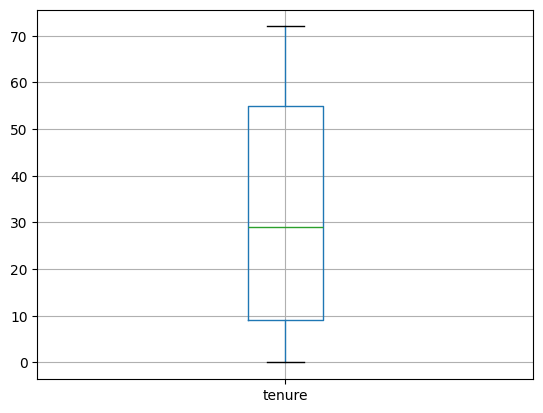

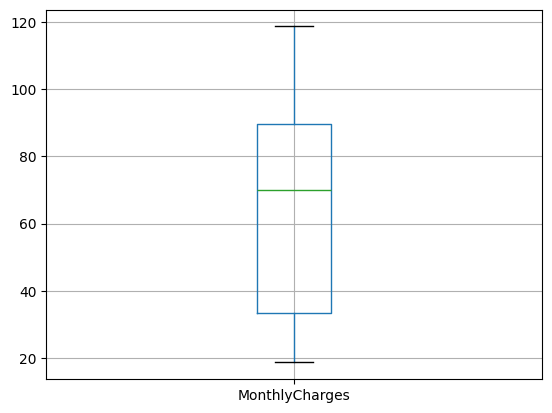

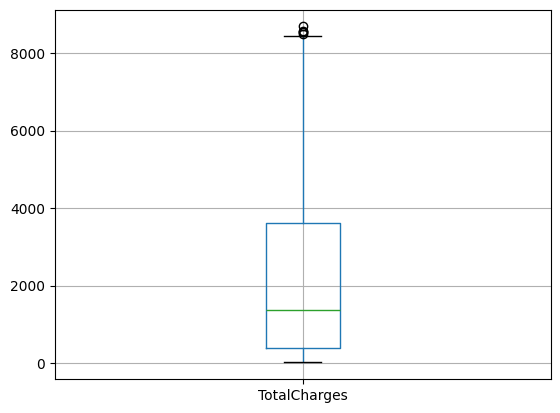

In [ ]:
for col in nmrc_cols:
    df_train1[[col]].boxplot()
    plt.show()

Sem outliers nas variáveis numéricas.

In [ ]:
# Em caso de outliers:

for col in nmrc_cols:
    q1 = df_train1[col].quantile(0.25)
    q3 = df_train1[col].quantile(0.75)
    iqr = q3 - q1

    df_train1 = df_train1[((df_train1[col] <= (q3 + 1.5*iqr)) & (df_train1[col] >= (q1 - 1.5*iqr))) | (df_train1['TotalCharges'].isna())]

---
Tratamento de dados ausentes:

In [ ]:
df_train1['TotalCharges'] = df_train1['TotalCharges'].fillna(0)
df_train1['TotalCharges'].isna().sum()

0

In [ ]:
# Agora com os conjuntos de validação e treinamento:

df_val1['TotalCharges'] = df_val1['TotalCharges'].fillna(0)
df_test1['TotalCharges'] = df_test1['TotalCharges'].fillna(0)

---
Codificação de dados categóricos:

In [ ]:
# Alterando colunas categóricas binárias para int

#df_train1['gender'] = df_train1['gender'].apply(lambda x: 0 if x=='Male' else 1)

rdict = {'gender': {'Male': 0, 'Female': 1},
         'Partner': {'No': 0, 'Yes': 1},
         'Dependents': {'No': 0, 'Yes': 1},
         'PhoneService': {'No': 0, 'Yes': 1},
         'PaperlessBilling': {'No': 0, 'Yes': 1},
         'Churn': {'No': 0, 'Yes': 1},
         }

df_train1 = df_train1.replace(rdict)
df_train1.head()

<ipython-input-21-4167367e1514>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train1 = df_train1.replace(rdict)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2057,1,0,1,0,22,1,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Month-to-month,1,Electronic check,79.20,1742.75,1
1704,0,0,0,1,1,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.75,99.75,1
6945,0,0,1,1,70,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,0,Bank transfer (automatic),98.30,6859.50,1
5956,1,0,0,0,31,1,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,1,Electronic check,89.90,2806.90,1
4678,1,0,0,1,2,1,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),94.20,193.80,1


In [ ]:
# Alterando colunas que são parcialmente dummy
# Exp.: OnlineSecurity: ("No internet service", "No", "Yes") -> (0, 1, 2)

rdict['MultipleLines'] = {'No phone service': 0, 'No': 1, 'Yes': 2}

cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

for col in cols:
    rdict[col] = {'No internet service': 0, 'No': 1, 'Yes': 2}

df_train1 = df_train1.replace(rdict)
df_train1.head()

<ipython-input-22-cbc0fd9477dc>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train1 = df_train1.replace(rdict)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2057,1,0,1,0,22,1,2,DSL,2,1,1,2,2,2,Month-to-month,1,Electronic check,79.20,1742.75,1
1704,0,0,0,1,1,1,2,Fiber optic,1,1,2,1,2,2,Month-to-month,1,Electronic check,99.75,99.75,1
6945,0,0,1,1,70,1,2,Fiber optic,1,2,1,1,2,2,Two year,0,Bank transfer (automatic),98.30,6859.50,1
5956,1,0,0,0,31,1,2,Fiber optic,1,1,2,1,1,2,Month-to-month,1,Electronic check,89.90,2806.90,1
4678,1,0,0,1,2,1,2,Fiber optic,1,1,1,1,2,2,Month-to-month,1,Bank transfer (automatic),94.20,193.80,1


In [ ]:
# Alterando colunas não-dummy

rdict['InternetService'] = {'No': 0, 'DSL': 1, 'Fiber optic': 2}

rdict['Contract'] = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

rdict['PaymentMethod'] = {'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1,
                          'Mailed check': 2, 'Electronic check': 3}

df_train1 = df_train1.replace(rdict)
df_train1.head()

<ipython-input-23-947b1f145f8c>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train1 = df_train1.replace(rdict)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2057,1,0,1,0,22,1,2,1,2,1,1,2,2,2,0,1,3,79.20,1742.75,1
1704,0,0,0,1,1,1,2,2,1,1,2,1,2,2,0,1,3,99.75,99.75,1
6945,0,0,1,1,70,1,2,2,1,2,1,1,2,2,2,0,1,98.30,6859.50,1
5956,1,0,0,0,31,1,2,2,1,1,2,1,1,2,0,1,3,89.90,2806.90,1
4678,1,0,0,1,2,1,2,2,1,1,1,1,2,2,0,1,1,94.20,193.80,1


In [ ]:
# Agora nos conjuntos de validação e teste:

df_val1 = df_val1.replace(rdict)
df_test1 = df_test1.replace(rdict)

<ipython-input-24-7cad4a5317f7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_val1 = df_val1.replace(rdict)
<ipython-input-24-7cad4a5317f7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test1 = df_test1.replace(rdict)


---
Normalização:

In [ ]:
# Normalização no conjunto de treinamento
scaler1 = MinMaxScaler()

df_train1[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler1.fit_transform(df_train1.loc[:,nmrc_cols], df_train1['Churn'])

# Normalização nos conjuntos de validação e teste, com base nos dados de treinamento
df_val1[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler1.transform(df_val1.loc[:,nmrc_cols])
df_test1[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler1.transform(df_test1.loc[:,nmrc_cols])

df_train1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_norm,MonthlyCharges_norm,TotalCharges_norm
2057,1,0,1,0,22,1,2,1,2,1,...,2,0,1,3,79.20,1742.75,1,0.305556,0.605606,0.206579
1704,0,0,0,1,1,1,2,2,1,1,...,2,0,1,3,99.75,99.75,1,0.013889,0.811311,0.011824
6945,0,0,1,1,70,1,2,2,1,2,...,2,2,0,1,98.30,6859.50,1,0.972222,0.796797,0.813098
5956,1,0,0,0,31,1,2,2,1,1,...,2,0,1,3,89.90,2806.90,1,0.430556,0.712713,0.332719
4678,1,0,0,1,2,1,2,2,1,1,...,2,0,1,1,94.20,193.80,1,0.027778,0.755756,0.022972


---
Balanceamento das classes:

In [ ]:
# Separação em dados de entrada e de saída
X_train1 = df_train1.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_train1_norm = df_train1.drop(columns=['Churn']+nmrc_cols)#, 'tenure', 'MonthlyCharges', 'TotalCharges'])
y_train1 = df_train1['Churn']

X_val1 = df_val1.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_val1_norm = df_val1.drop(columns=['Churn']+nmrc_cols)
y_val1 = df_val1['Churn']

X_test1 = df_test1.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_test1_norm = df_test1.drop(columns=['Churn']+nmrc_cols)
y_test1 = df_test1['Churn']

In [ ]:
# Balanceamento no conjunto de treinamento
o_sampler = RandomOverSampler(random_state=seed)

y_train1_norm = y_train1.copy()
X_train1, y_train1 = o_sampler.fit_resample(X_train1, y_train1)
X_train1_norm, y_train1_norm = o_sampler.fit_resample(X_train1_norm, y_train1_norm)

## Fold2 como conjunto de Treinamento

In [ ]:
df_train2 = fold2.copy()
df_val2 = fold3.copy()
df_test2 = fold1.copy()

### EDA

In [ ]:
total = len(df_train2)
for col in cat_cols:
    print(col + ':')
    print('  \tNo\tYes\t(Total)')
    for v in df_train2[col].unique():
        print(f'{v}\t{(len(df_train2[(df_train2[col] == v) & (df_train2["Churn"] == "No")])/total):.2f}\t{(len(df_train2[(df_train2[col] == v) & (df_train2["Churn"] == "Yes")])/total):.2f}\t({len(df_train2[(df_train2[col] == v)])})')
    print()

gender:
  	No	Yes	(Total)
Male	0.38	0.14	(1207)
Female	0.36	0.13	(1141)

SeniorCitizen:
  	No	Yes	(Total)
1	0.09	0.07	(384)
0	0.64	0.20	(1964)

Partner:
  	No	Yes	(Total)
Yes	0.38	0.10	(1113)
No	0.36	0.17	(1235)

Dependents:
  	No	Yes	(Total)
No	0.49	0.22	(1675)
Yes	0.24	0.04	(673)

PhoneService:
  	No	Yes	(Total)
Yes	0.66	0.24	(2118)
No	0.07	0.02	(230)

MultipleLines:
  	No	Yes	(Total)
Yes	0.30	0.12	(990)
No	0.36	0.12	(1128)
No phone service	0.07	0.02	(230)

InternetService:
  	No	Yes	(Total)
Fiber optic	0.25	0.19	(1039)
DSL	0.28	0.06	(809)
No	0.20	0.02	(500)

OnlineSecurity:
  	No	Yes	(Total)
No	0.30	0.21	(1185)
Yes	0.24	0.04	(663)
No internet service	0.20	0.02	(500)

OnlineBackup:
  	No	Yes	(Total)
Yes	0.26	0.08	(807)
No	0.27	0.17	(1041)
No internet service	0.20	0.02	(500)

DeviceProtection:
  	No	Yes	(Total)
Yes	0.26	0.07	(787)
No	0.27	0.18	(1061)
No internet service	0.20	0.02	(500)

TechSupport:
  	No	Yes	(Total)
No	0.30	0.21	(1202)
Yes	0.23	0.04	(646)
No internet service	0.20	0.0

### Manipulação do Dataset (4-6)

Tratamento de outliers:

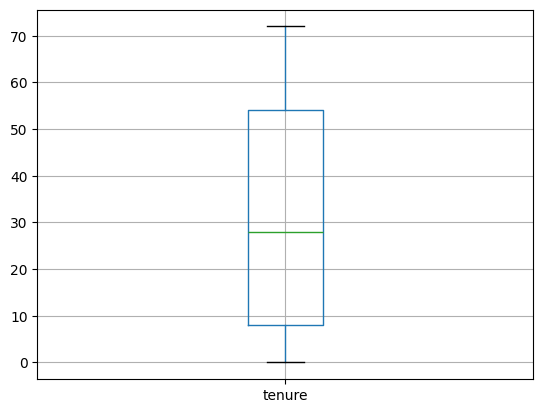

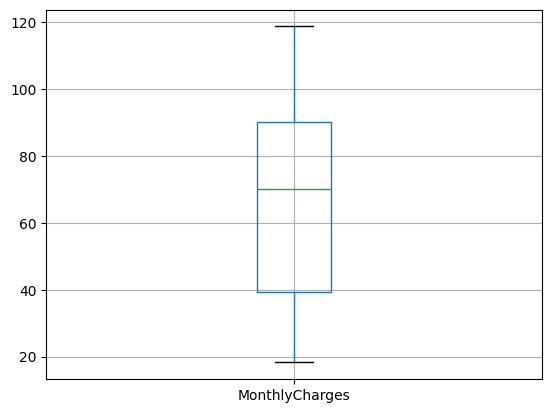

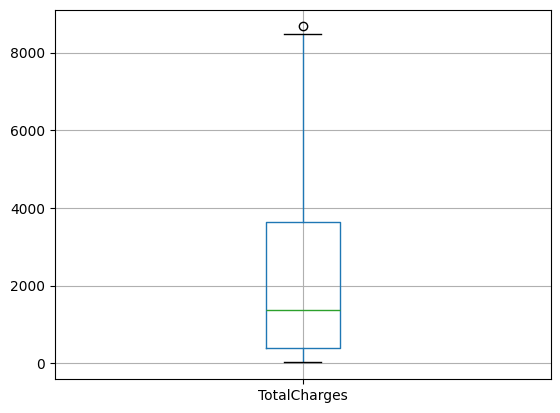

In [ ]:
for col in nmrc_cols:
    df_train2[[col]].boxplot()
    plt.show()

Sem presença de outliers

In [ ]:
# Em caso de outliers:

for col in nmrc_cols:
    q1 = df_train2[col].quantile(0.25)
    q3 = df_train2[col].quantile(0.75)
    iqr = q3 - q1

    df_train2 = df_train2[((df_train2[col] <= (q3 + 1.5*iqr)) & (df_train2[col] >= (q1 - 1.5*iqr))) | (df_train2['TotalCharges'].isna())]

---
Tratamento de dados ausentes:

In [ ]:
df_train2['TotalCharges'] = df_train2['TotalCharges'].fillna(0)
df_train2['TotalCharges'].isna().sum()

0

In [ ]:
# Agora com os conjuntos de validação e treinamento:

df_val2['TotalCharges'] = df_val2['TotalCharges'].fillna(0)
df_test2['TotalCharges'] = df_test2['TotalCharges'].fillna(0)

---
Codificação de dados categóricos:

In [ ]:
rdict = {'gender': {'Male': 0, 'Female': 1},
         'Partner': {'No': 0, 'Yes': 1},
         'Dependents': {'No': 0, 'Yes': 1},
         'PhoneService': {'No': 0, 'Yes': 1},
         'PaperlessBilling': {'No': 0, 'Yes': 1},
         'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
         'OnlineSecurity': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'OnlineBackup': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'DeviceProtection': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'TechSupport': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'StreamingTV': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'StreamingMovies': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'InternetService': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
         'Contract':{'Month-to-month': 0, 'One year': 1, 'Two year': 2},
         'PaymentMethod':{'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1,
                          'Mailed check': 2, 'Electronic check': 3},
         'Churn': {'No': 0, 'Yes': 1}
         }

df_train2 = df_train2.replace(rdict)
df_train2.head()

<ipython-input-34-faac5436ffa6>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train2 = df_train2.replace(rdict)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
978,0,1,1,0,62,1,2,2,1,2,2,1,2,2,1,1,3,103.75,6383.35,1
2023,1,1,1,0,5,1,2,2,1,2,1,1,1,1,0,1,3,81.00,371.65,1
6365,0,1,1,0,7,1,2,2,1,1,2,1,2,2,0,1,3,101.95,700.85,1
1543,1,0,1,0,5,1,1,2,1,1,1,1,1,1,0,0,3,69.95,330.15,1
6717,0,1,1,0,57,1,2,2,1,1,2,1,2,2,0,0,3,100.60,5746.15,1


In [ ]:
# Agora nos conjuntos de validação e teste:

df_val2 = df_val2.replace(rdict)
df_test2 = df_test2.replace(rdict)

<ipython-input-35-9648ded9aeee>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_val2 = df_val2.replace(rdict)
<ipython-input-35-9648ded9aeee>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test2 = df_test2.replace(rdict)


---
Normalização:

In [ ]:
# Normalização no conjunto de treinamento
scaler2 = MinMaxScaler()

df_train2[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler2.fit_transform(df_train2.loc[:,nmrc_cols], df_train2['Churn'])

# Normalização nos conjuntos de validação e teste, com base nos dados de treinamento
df_val2[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler2.transform(df_val2.loc[:,nmrc_cols])
df_test2[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler2.transform(df_test2.loc[:,nmrc_cols])

df_train2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_norm,MonthlyCharges_norm,TotalCharges_norm
978,0,1,1,0,62,1,2,2,1,2,...,2,1,1,3,103.75,6383.35,1,0.861111,0.860594,0.753064
2023,1,1,1,0,5,1,2,2,1,2,...,1,0,1,3,81.00,371.65,1,0.069444,0.631605,0.043845
6365,0,1,1,0,7,1,2,2,1,1,...,2,0,1,3,101.95,700.85,1,0.097222,0.842476,0.082682
1543,1,0,1,0,5,1,1,2,1,1,...,1,0,0,3,69.95,330.15,1,0.069444,0.520382,0.038949
6717,0,1,1,0,57,1,2,2,1,1,...,2,0,0,3,100.60,5746.15,1,0.791667,0.828888,0.677892


---
Balanceamento das classes:

In [ ]:
# Separação em dados de entrada e de saída
X_train2 = df_train2.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_train2_norm = df_train2.drop(columns=['Churn']+nmrc_cols)#, 'tenure', 'MonthlyCharges', 'TotalCharges'])
y_train2 = df_train2['Churn']

X_val2 = df_val2.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_val2_norm = df_val2.drop(columns=['Churn']+nmrc_cols)
y_val2 = df_val2['Churn']

X_test2 = df_test2.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_test2_norm = df_test2.drop(columns=['Churn']+nmrc_cols)
y_test2 = df_test2['Churn']

In [ ]:
# Balanceamento no conjunto de treinamento
o_sampler = RandomOverSampler(random_state=seed)

y_train2_norm = y_train2.copy()
X_train2, y_train2 = o_sampler.fit_resample(X_train2, y_train2)
X_train2_norm, y_train2_norm = o_sampler.fit_resample(X_train2_norm, y_train2_norm)

## Fold3 como conjunto de Treinamento

In [ ]:
df_train3 = fold3.copy()
df_val3 = fold1.copy()
df_test3 = fold2.copy()

### EDA

In [ ]:
total = len(df_train3)
for col in cat_cols:
    print(col + ':')
    print('  \tNo\tYes\t(Total)')
    for v in df_train3[col].unique():
        print(f'{v}\t{(len(df_train3[(df_train3[col] == v) & (df_train3["Churn"] == "No")])/total):.2f}\t{(len(df_train3[(df_train3[col] == v) & (df_train3["Churn"] == "Yes")])/total):.2f}\t({len(df_train3[(df_train3[col] == v)])})')
    print()

gender:
  	No	Yes	(Total)
Male	0.37	0.13	(1183)
Female	0.36	0.14	(1165)

SeniorCitizen:
  	No	Yes	(Total)
0	0.64	0.20	(1975)
1	0.10	0.06	(373)

Partner:
  	No	Yes	(Total)
Yes	0.40	0.09	(1149)
No	0.33	0.18	(1199)

Dependents:
  	No	Yes	(Total)
Yes	0.26	0.05	(717)
No	0.48	0.22	(1631)

PhoneService:
  	No	Yes	(Total)
Yes	0.67	0.24	(2136)
No	0.07	0.02	(212)

MultipleLines:
  	No	Yes	(Total)
Yes	0.31	0.12	(1019)
No	0.36	0.12	(1117)
No phone service	0.07	0.02	(212)

InternetService:
  	No	Yes	(Total)
Fiber optic	0.26	0.18	(1039)
DSL	0.28	0.06	(807)
No	0.19	0.02	(502)

OnlineSecurity:
  	No	Yes	(Total)
No	0.29	0.21	(1170)
Yes	0.25	0.04	(676)
No internet service	0.19	0.02	(502)

OnlineBackup:
  	No	Yes	(Total)
No	0.25	0.17	(989)
Yes	0.29	0.07	(857)
No internet service	0.19	0.02	(502)

DeviceProtection:
  	No	Yes	(Total)
No	0.26	0.17	(1003)
Yes	0.28	0.08	(843)
No internet service	0.19	0.02	(502)

TechSupport:
  	No	Yes	(Total)
Yes	0.25	0.04	(697)
No	0.29	0.20	(1149)
No internet service	0.19	0.0

### Manipulação do Dataset

Tratamento de outliers:

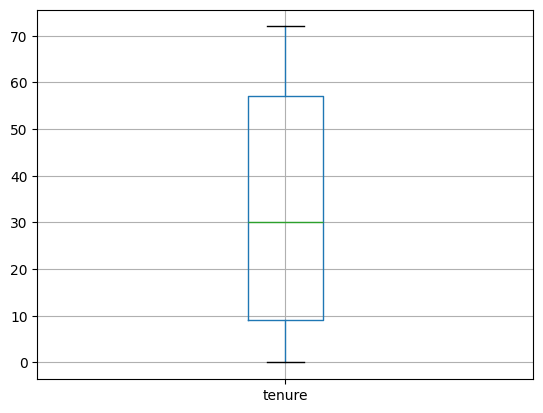

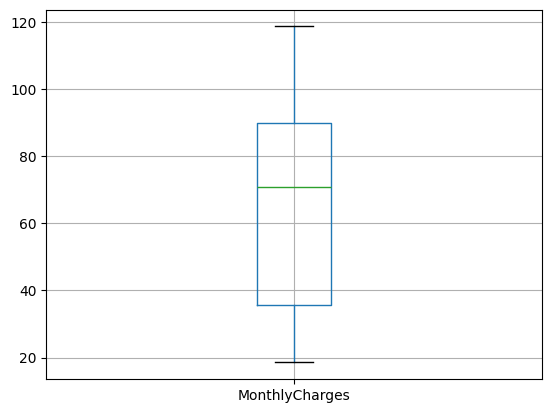

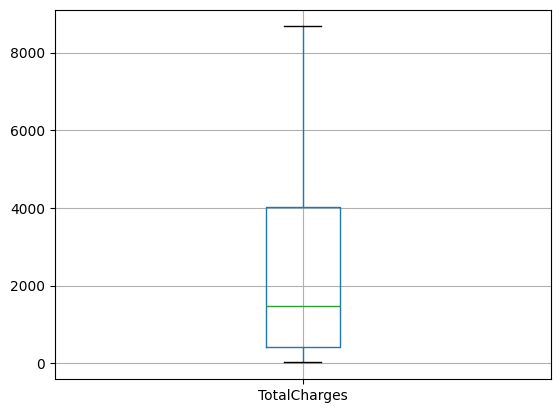

In [ ]:
for col in nmrc_cols:
    df_train3[[col]].boxplot()
    plt.show()

In [ ]:
# Em caso de outliers:

for col in nmrc_cols:
    q1 = df_train3[col].quantile(0.25)
    q3 = df_train3[col].quantile(0.75)
    iqr = q3 - q1

    df_train3 = df_train3[((df_train3[col] <= (q3 + 1.5*iqr)) & (df_train3[col] >= (q1 - 1.5*iqr))) | (df_train3['TotalCharges'].isna())]

---
Tratamento de dados ausentes:

In [ ]:
df_train3['TotalCharges'] = df_train3['TotalCharges'].fillna(0)
df_train3['TotalCharges'].isna().sum()

0

In [ ]:
# Agora com os conjuntos de validação e treinamento:

df_val3['TotalCharges'] = df_val3['TotalCharges'].fillna(0)
df_test3['TotalCharges'] = df_test3['TotalCharges'].fillna(0)

---
Codificação de dados categóricos:

In [ ]:
rdict = {'gender': {'Male': 0, 'Female': 1},
         'Partner': {'No': 0, 'Yes': 1},
         'Dependents': {'No': 0, 'Yes': 1},
         'PhoneService': {'No': 0, 'Yes': 1},
         'PaperlessBilling': {'No': 0, 'Yes': 1},
         'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
         'OnlineSecurity': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'OnlineBackup': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'DeviceProtection': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'TechSupport': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'StreamingTV': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'StreamingMovies': {'No internet service': 0, 'No': 1, 'Yes': 2},
         'InternetService': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
         'Contract':{'Month-to-month': 0, 'One year': 1, 'Two year': 2},
         'PaymentMethod':{'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1,
                          'Mailed check': 2, 'Electronic check': 3},
         'Churn': {'No': 0, 'Yes': 1}
         }

df_train3 = df_train3.replace(rdict)
df_train3.head()

<ipython-input-45-0b04c05abb69>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train3 = df_train3.replace(rdict)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3287,0,0,1,1,19,1,2,2,1,1,1,2,2,2,1,1,3,100.95,1875.55,1
6378,0,0,1,1,13,1,1,2,2,1,1,1,1,2,0,0,3,84.05,1095.30,1
3495,0,1,0,0,1,1,2,2,1,1,1,1,1,1,0,1,3,75.35,75.35,1
4738,0,0,0,0,5,1,2,2,1,2,2,1,2,2,0,0,2,104.10,541.90,1
642,0,0,0,0,1,1,1,2,1,1,1,1,2,2,0,1,3,89.55,89.55,1


In [ ]:
for col in cat_cols:
    print(col)
    print(df_train3[col].unique())

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[1 0]
PhoneService
[1 0]
MultipleLines
[2 1 0]
InternetService
[2 1 0]
OnlineSecurity
[1 2 0]
OnlineBackup
[1 2 0]
DeviceProtection
[1 2 0]
TechSupport
[2 1 0]
StreamingTV
[2 1 0]
StreamingMovies
[2 1 0]
Contract
[1 0 2]
PaperlessBilling
[1 0]
PaymentMethod
[3 2 0 1]


In [ ]:
# Agora nos conjuntos de validação e teste:

df_val3 = df_val3.replace(rdict)
df_test3 = df_test3.replace(rdict)

<ipython-input-47-9fd5ab9d5b16>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_val3 = df_val3.replace(rdict)
<ipython-input-47-9fd5ab9d5b16>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test3 = df_test3.replace(rdict)


---
Normalização:

In [ ]:
# Normalização no conjunto de treinamento
scaler3 = MinMaxScaler()

df_train3[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler3.fit_transform(df_train3.loc[:,nmrc_cols], df_train3['Churn'])

# Normalização nos conjuntos de validação e teste, com base nos dados de treinamento
df_val3[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler3.transform(df_val3.loc[:,nmrc_cols])
df_test3[['tenure_norm', 'MonthlyCharges_norm', 'TotalCharges_norm']] = scaler3.transform(df_test3.loc[:,nmrc_cols])

df_train3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_norm,MonthlyCharges_norm,TotalCharges_norm
3287,0,0,1,1,19,1,2,2,1,1,...,2,1,1,3,100.95,1875.55,1,0.263889,0.823177,0.216324
6378,0,0,1,1,13,1,1,2,2,1,...,2,0,0,3,84.05,1095.30,1,0.180556,0.654346,0.126331
3495,0,1,0,0,1,1,2,2,1,1,...,1,0,1,3,75.35,75.35,1,0.013889,0.567433,0.008691
4738,0,0,0,0,5,1,2,2,1,2,...,2,0,0,2,104.10,541.90,1,0.069444,0.854645,0.062502
642,0,0,0,0,1,1,1,2,1,1,...,2,0,1,3,89.55,89.55,1,0.013889,0.709291,0.010329


---
Balanceamento das classes:

In [ ]:
# Separação em dados de entrada e de saída
X_train3 = df_train3.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_train3_norm = df_train3.drop(columns=['Churn']+nmrc_cols)#, 'tenure', 'MonthlyCharges', 'TotalCharges'])
y_train3 = df_train3['Churn']

X_val3 = df_val3.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_val3_norm = df_val3.drop(columns=['Churn']+nmrc_cols)
y_val3 = df_val3['Churn']

X_test3 = df_test3.drop(columns=['Churn','tenure_norm','MonthlyCharges_norm', 'TotalCharges_norm'])
X_test3_norm = df_test3.drop(columns=['Churn']+nmrc_cols)
y_test3 = df_test3['Churn']

In [ ]:
# Balanceamento no conjunto de treinamento
o_sampler = RandomOverSampler(random_state=seed)

y_train3_norm = y_train3.copy()
X_train3, y_train3 = o_sampler.fit_resample(X_train3, y_train3)
X_train3_norm, y_train3_norm = o_sampler.fit_resample(X_train3_norm, y_train3_norm)

# Modelos de ML
Treinamento, teste e avaliações

In [ ]:
NUM_TRIALS = 20

In [ ]:
#from numba import cuda as c
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

### STab

- dim (dimensão dos componentes do transformer)
- depth (profundidade da rede)
- dim_head (dimensão de cada cabeça da atenção) [usar números com raiz quadrada inteira]
- head (quantidade de cabeças de atenção)
- attn_dropout (dropout do mecanismo de atenção)
- ff_dropout (dropout da rede FF)
- U (número de unidades dentro do bloco LWTA da porção FF da arquitetura)
- cases

In [62]:
X_train1_norm_dvc = torch.Tensor(X_train1_norm.values).to(DEVICE)
y_train1_norm_dvc = torch.Tensor(y_train1_norm.values).type(torch.long).to(DEVICE)

X_val1_norm_dvc = torch.Tensor(X_val1_norm.values).to(DEVICE)
y_val1_dvc = torch.Tensor(y_val1.values).type(torch.long).to(DEVICE)

X_test1_norm_dvc = torch.Tensor(X_test1_norm.values).to(DEVICE)
y_test1_dvc = torch.Tensor(y_test1.values).type(torch.long).to(DEVICE)

train_input_norm_dvc = torch.cat([X_train1_norm_dvc, X_val1_norm_dvc], axis=0)
train_label_norm_dvc = torch.cat([y_train1_norm_dvc, y_val1_dvc], axis=0)
print(train_input_norm_dvc.shape)

torch.Size([5788, 19])


In [ ]:
#NUM_CONTINUOUS = 19

# 1. Define an objective function to be maximized.
def stab_objective(trial:optuna.trial._trial.Trial):

    # 2. Suggest values for the hyperparameters using a trial object.
    attn_dropout = trial.suggest_float('attn_dropout', 0.1, 0.6)
    ff_dropout = trial.suggest_float('ff_dropout', 0.01, 0.2)
    #u = trial.suggest_int('u', 2, 5) (melhores modelos tinham todos u=3)
    cases = trial.suggest_int('cases', 4, 20, step=4)
    dim = trial.suggest_int('dim', 4, 20, step=4)
    depth = trial.suggest_int('depth', 1, 2)
    heads = trial.suggest_int('heads', 3, 8)
    dim_head = trial.suggest_int('dim_head', 24, 72, step=8)
    lr = trial.suggest_float('opt-lr', 0.0001, 0.001)
    weight_decay = trial.suggest_categorical('opt-weight_decay', [0.0001, 0.001, 0.005])

    # Definir o modelo (sem categorias)
    Or_model = STABModel(
        categories        = (),   # Sem features categóricas
        num_continuous    = 19,
        dim               = dim,
        dim_out           = 2,    # 2 classes
        depth             = depth,
        heads             = heads,
        attn_dropout      = attn_dropout,
        ff_dropout        = ff_dropout,
        U                 = 3,
        cases             = cases,
        dim_head         = dim_head
    )#.to(DEVICE)

    # Criar o wrapper Num_Cat para gerenciar as entradas corretamente
    no_model = Num_Cat(Or_model, num_number=19, classes=2, Sample_size=16)#.to(DEVICE)  # 4 features numéricas, 3 classes (Iris)

    # Passar o modelo para keras4torch
    model = keras4torch.Model(no_model).build([19])#.to(DEVICE)  # Agora só precisa da dimensão numérica


    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    model.compile(optimizer=optimizer, loss=F.cross_entropy, device=DEVICE)

    # Treinamento (passando apenas X numérico)
    model.fit([X_train1_norm_dvc], y_train1_norm_dvc,  # Ajuste aqui: lista com X_train
            epochs=10, batch_size=16,
            validation_data=([X_val1_norm_dvc], y_val1_dvc),  # Ajuste aqui (na vdd mudar isso pq eu estaria fazendo cross-validation)
            verbose=0)

    #test_logits = model.predict([np.array(X_test1_norm)])  # Passar X_test como lista
    #test_preds = np.argmax(test_logits, axis=1)
    #accuracy = np.mean(test_preds == np.array(y_test1))
    y_pred = general_predict_proba(model, X_val1_norm_dvc)

    # apenas testando com o recall
    score, _ = ks_score(to_np(y_val1_dvc), y_pred)#f1_score(to_np(y_val1_dvc), y_pred)
    #accuracy = score.mean()

    return score

# 3. Create a study object and optimize the objective function.
stab_study = optuna.create_study(direction='maximize')
stab_study.optimize(stab_objective, n_trials=15)
print(stab_study.best_trial)

[I 2025-04-13 19:09:33,435] A new study created in memory with name: no-name-6b85cc0f-5125-4a1b-8178-11fd955acf8a
[I 2025-04-13 19:14:52,155] Trial 0 finished with value: 0.5075478633075116 and parameters: {'attn_dropout': 0.18363641207045908, 'ff_dropout': 0.025207417781085352, 'cases': 12, 'dim': 8, 'depth': 2, 'heads': 5, 'dim_head': 64, 'opt-lr': 0.0003846519471467137, 'opt-weight_decay': 0.001}. Best is trial 0 with value: 0.5075478633075116.
[I 2025-04-13 19:20:04,196] Trial 1 finished with value: 0.5085649149742946 and parameters: {'attn_dropout': 0.22370758870107751, 'ff_dropout': 0.17533611890098186, 'cases': 12, 'dim': 4, 'depth': 2, 'heads': 4, 'dim_head': 56, 'opt-lr': 0.0005867697150637985, 'opt-weight_decay': 0.005}. Best is trial 1 with value: 0.5085649149742946.
[I 2025-04-13 19:23:04,402] Trial 2 finished with value: 0.5244878684253379 and parameters: {'attn_dropout': 0.40760714850973456, 'ff_dropout': 0.012709300759280437, 'cases': 20, 'dim': 12, 'depth': 1, 'heads': 

FrozenTrial(number=6, state=1, values=[0.5394700723474538], datetime_start=datetime.datetime(2025, 4, 13, 19, 34, 1, 195838), datetime_complete=datetime.datetime(2025, 4, 13, 19, 39, 7, 295814), params={'attn_dropout': 0.5855118229968217, 'ff_dropout': 0.09787614273955834, 'cases': 8, 'dim': 12, 'depth': 2, 'heads': 7, 'dim_head': 56, 'opt-lr': 0.0008187894167880098, 'opt-weight_decay': 0.0001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'attn_dropout': FloatDistribution(high=0.6, log=False, low=0.1, step=None), 'ff_dropout': FloatDistribution(high=0.2, log=False, low=0.01, step=None), 'cases': IntDistribution(high=20, log=False, low=4, step=4), 'dim': IntDistribution(high=20, log=False, low=4, step=4), 'depth': IntDistribution(high=2, log=False, low=1, step=1), 'heads': IntDistribution(high=8, log=False, low=3, step=1), 'dim_head': IntDistribution(high=72, log=False, low=24, step=8), 'opt-lr': FloatDistribution(high=0.001, log=False, low=0.0001, step=None),

In [ ]:
Or_model = STABModel(
        categories        = (),   # Sem features categóricas
        num_continuous    = 19,
        dim               = stab_study.best_params['dim'],
        dim_out           = 2,    # 2 classes
        depth             = stab_study.best_params['depth'],
        heads             = stab_study.best_params['heads'],
        attn_dropout      = stab_study.best_params['attn_dropout'],
        ff_dropout        = stab_study.best_params['ff_dropout'],
        U                 = 3,#stab_study.best_params['u'],
        cases             = stab_study.best_params['cases'],
        dim_head          = stab_study.best_params['dim_head']
    )

# Criar o wrapper Num_Cat para gerenciar as entradas corretamente
no_model = Num_Cat(Or_model, num_number=19, classes=2, Sample_size=16)  # 4 features numéricas, 3 classes (Iris)

# Passar o modelo para keras4torch
model = keras4torch.Model(no_model).build([19])  # Agora só precisa da dimensão numérica

optimizer = torch.optim.AdamW(model.parameters(), lr=stab_study.best_params['opt-lr'], weight_decay=stab_study.best_params['opt-weight_decay'])
model.compile(optimizer=optimizer, loss=F.cross_entropy) # vou ter que fazer manualmente as outras métricas

# Treinamento (passando apenas X numérico)
model.fit([train_input_norm_dvc], train_label_norm_dvc,  # Ajuste aqui: lista com X_train
        epochs=20, batch_size=16,
        validation_data=([X_test1_norm_dvc], y_test1_dvc),  # Ajuste aqui
        verbose=2)

torch.save(model.state_dict(), "STab.pkl")

Train on 5788 samples, validate on 2348 samples:
Epoch 1/20 - 47s - loss: 0.5788 - val_loss: 0.4636 - lr: 8.2e-04
Epoch 2/20 - 48s - loss: 0.5295 - val_loss: 0.5099 - lr: 8.2e-04
Epoch 3/20 - 48s - loss: 0.5193 - val_loss: 0.4625 - lr: 8.2e-04
Epoch 4/20 - 47s - loss: 0.5105 - val_loss: 0.4627 - lr: 8.2e-04
Epoch 5/20 - 48s - loss: 0.5102 - val_loss: 0.4735 - lr: 8.2e-04
Epoch 6/20 - 48s - loss: 0.5057 - val_loss: 0.4851 - lr: 8.2e-04
Epoch 7/20 - 48s - loss: 0.5017 - val_loss: 0.4273 - lr: 8.2e-04
Epoch 8/20 - 48s - loss: 0.4995 - val_loss: 0.4604 - lr: 8.2e-04
Epoch 9/20 - 48s - loss: 0.4979 - val_loss: 0.4359 - lr: 8.2e-04
Epoch 10/20 - 48s - loss: 0.4979 - val_loss: 0.4887 - lr: 8.2e-04
Epoch 11/20 - 48s - loss: 0.4914 - val_loss: 0.4509 - lr: 8.2e-04
Epoch 12/20 - 48s - loss: 0.4942 - val_loss: 0.4310 - lr: 8.2e-04
Epoch 13/20 - 48s - loss: 0.4946 - val_loss: 0.4253 - lr: 8.2e-04
Epoch 14/20 - 48s - loss: 0.4934 - val_loss: 0.4477 - lr: 8.2e-04
Epoch 15/20 - 48s - loss: 0.4887 - v

In [ ]:
import json
#a = {'a':1,'b':2,'c':3}
with open("STab.json", "w") as fp:
    json.dump(stab_study.best_params , fp)

In [ ]:
stab_study.best_params

{'attn_dropout': 0.21384278340497057,
 'ff_dropout': 0.03346593114513272,
 'u': 3,
 'cases': 16,
 'dim': 16,
 'depth': 2,
 'heads': 7,
 'dim_head': 25,
 'opt-lr': 0.001,
 'opt-weight_decay': 0.0001}

[Treinamento]

Accuracy:         0.7687
Recall:           0.6795
Precision:        0.7303
F1:               0.7040
AUROC:            0.8523
AUPR:             0.7828

[Teste]

Accuracy:         0.7939
Recall:           0.6838
Precision:        0.5975
F1:               0.6377
AUROC:            0.8460
AUPR:             0.6567


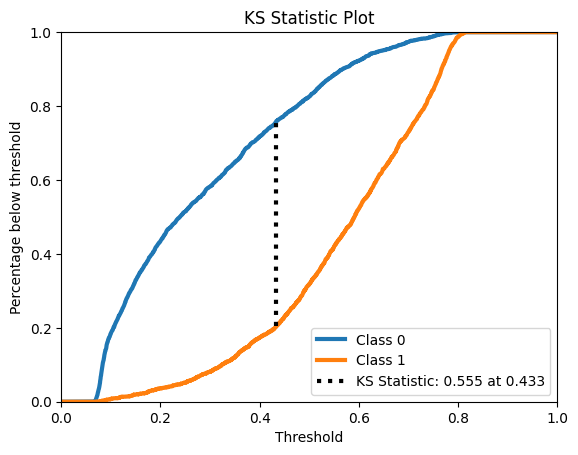

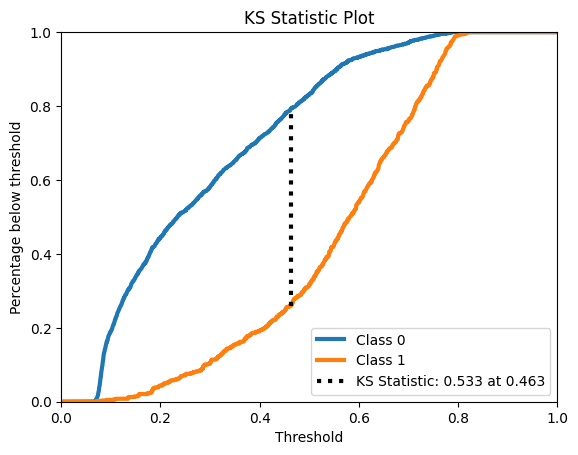

In [ ]:
print('[Treinamento]')
y_pred = general_predict(model, train_input_norm_dvc)
y_pred_proba = general_predict_proba(model, train_input_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(train_label_norm_dvc), to_np(y_pred), to_np(y_pred_proba))

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

print('\n[Teste]')
y_pred = general_predict(model, X_test1_norm_dvc)
y_pred_proba = general_predict_proba(model, X_test1_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(y_test1_dvc), y_pred, y_pred_proba)

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

- 'attn_dropout': 0.4928415803509742
- 'ff_dropout': 0.13204097189753472
- 'u': 3
- 'cases': 8
- 'dim': 8
- 'depth': 1
- 'heads': 4
- 'dim_head': 64
- 'opt-lr': 0.01
- 'opt-weight_decay': 0.005

In [86]:
with open('STab.json', 'r') as f:
    stab_params = json.load(f)

In [87]:
Or_model = STABModel(
        categories        = (),   # Sem features categóricas
        num_continuous    = 19,
        dim               = stab_params['dim'],
        dim_out           = 2,    # 2 classes
        depth             = stab_params['depth'],
        heads             = stab_params['heads'],
        attn_dropout      = stab_params['attn_dropout'],
        ff_dropout        = stab_params['ff_dropout'],
        U                 = 3,
        cases             = stab_params['cases'],
        dim_head          = stab_params['dim_head']
    )

# Criar o wrapper Num_Cat para gerenciar as entradas corretamente
no_model = Num_Cat(Or_model, num_number=19, classes=2, Sample_size=16)  # 4 features numéricas, 3 classes (Iris)

# Passar o modelo para keras4torch
model = keras4torch.Model(no_model).build([19])  # Agora só precisa da dimensão numérica

optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.005)
model.compile(optimizer=optimizer, loss=F.cross_entropy, device=DEVICE) # vou ter que fazer manualmente as outras métricas

# Treinamento (passando apenas X numérico)
model.fit([train_input_norm_dvc], train_label_norm_dvc,  # Ajuste aqui: lista com X_train
        epochs=20, batch_size=16,
        validation_data=([X_test1_norm_dvc], y_test1_dvc),  # Ajuste aqui
        verbose=2)

Train on 5788 samples, validate on 2348 samples:
Epoch 1/20 - 49s - loss: 0.5582 - val_loss: 0.4707 - lr: 1e-02
Epoch 2/20 - 49s - loss: 0.5232 - val_loss: 0.4723 - lr: 1e-02
Epoch 3/20 - 49s - loss: 0.5168 - val_loss: 0.4797 - lr: 1e-02
Epoch 4/20 - 48s - loss: 0.5106 - val_loss: 0.4531 - lr: 1e-02
Epoch 5/20 - 48s - loss: 0.5040 - val_loss: 0.4361 - lr: 1e-02
Epoch 6/20 - 48s - loss: 0.5015 - val_loss: 0.4333 - lr: 1e-02
Epoch 7/20 - 49s - loss: 0.4956 - val_loss: 0.4634 - lr: 1e-02
Epoch 8/20 - 49s - loss: 0.4962 - val_loss: 0.4505 - lr: 1e-02
Epoch 9/20 - 49s - loss: 0.4963 - val_loss: 0.4751 - lr: 1e-02
Epoch 10/20 - 48s - loss: 0.4939 - val_loss: 0.4335 - lr: 1e-02
Epoch 11/20 - 49s - loss: 0.4918 - val_loss: 0.4538 - lr: 1e-02
Epoch 12/20 - 49s - loss: 0.4921 - val_loss: 0.4203 - lr: 1e-02
Epoch 13/20 - 49s - loss: 0.4931 - val_loss: 0.5153 - lr: 1e-02
Epoch 14/20 - 48s - loss: 0.4865 - val_loss: 0.4405 - lr: 1e-02
Epoch 15/20 - 48s - loss: 0.4910 - val_loss: 0.4554 - lr: 1e-02


,loss,val_loss,lr
1,0.558245,0.470665,0.01
2,0.523205,0.472257,0.01
3,0.516825,0.479651,0.01
4,0.510606,0.453085,0.01
5,0.504042,0.436138,0.01
6,0.501511,0.433263,0.01
7,0.495636,0.463442,0.01
8,0.496159,0.450513,0.01
9,0.496252,0.475094,0.01
10,0.493861,0.433473,0.01


[Treinamento]

Accuracy:         0.7643
Recall:           0.6884
Precision:        0.7178
F1:               0.7028
AUROC:            0.8508
AUPR:             0.7813

[Teste]

Accuracy:         0.7917
Recall:           0.6950
Precision:        0.5915
F1:               0.6391
AUROC:            0.8466
AUPR:             0.6540


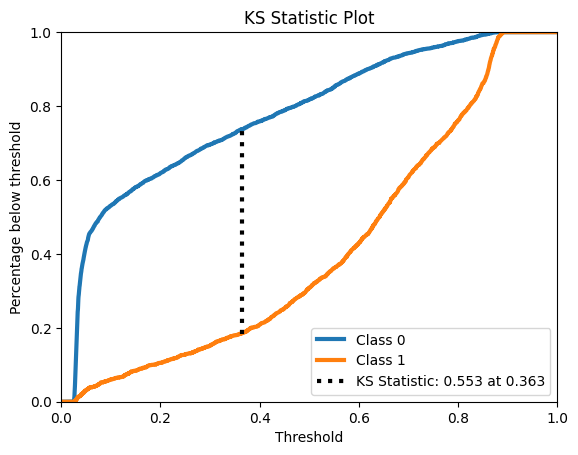

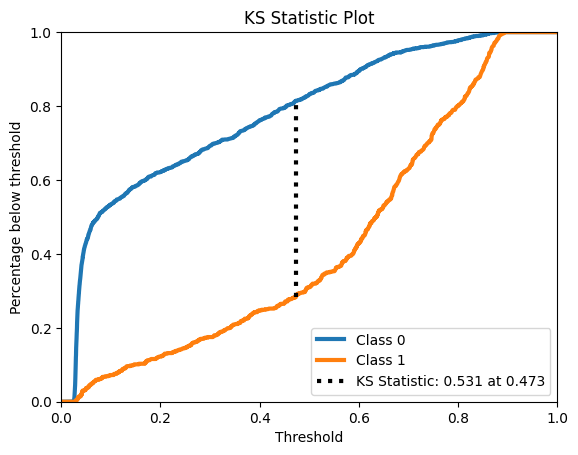

In [88]:
print('[Treinamento]')
y_pred = general_predict(model, train_input_norm_dvc)
y_pred_proba = general_predict_proba(model, train_input_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(train_label_norm_dvc), to_np(y_pred), to_np(y_pred_proba))

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

print('\n[Teste]')
y_pred = general_predict(model, X_test1_norm_dvc)
y_pred_proba = general_predict_proba(model, X_test1_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(y_test1_dvc), y_pred, y_pred_proba)

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

In [89]:
torch.save(model.state_dict(), "STab.pkl")

In [90]:
X_train2_norm_dvc = torch.Tensor(X_train2_norm.values).to(DEVICE)
y_train2_norm_dvc = torch.Tensor(y_train2_norm.values).type(torch.long).to(DEVICE)

X_val2_norm_dvc = torch.Tensor(X_val2_norm.values).to(DEVICE)
y_val2_dvc = torch.Tensor(y_val2.values).type(torch.long).to(DEVICE)

X_test2_norm_dvc = torch.Tensor(X_test2_norm.values).to(DEVICE)
y_test2_dvc = torch.Tensor(y_test2.values).type(torch.long).to(DEVICE)

train_input_norm_dvc = torch.cat([X_train2_norm_dvc, X_val2_norm_dvc], axis=0)
train_label_norm_dvc = torch.cat([y_train2_norm_dvc, y_val2_dvc], axis=0)
print(train_input_norm_dvc.shape)

torch.Size([5796, 19])


In [91]:
Or_model2 = STABModel(
        categories        = (),   # Sem features categóricas
        num_continuous    = 19,
        dim               = stab_params['dim'],
        dim_out           = 2,    # 2 classes
        depth             = stab_params['depth'],
        heads             = stab_params['heads'],
        attn_dropout      = stab_params['attn_dropout'],
        ff_dropout        = stab_params['ff_dropout'],
        U                 = 3,
        cases             = stab_params['cases'],
        dim_head          = stab_params['dim_head']
    )

# Criar o wrapper Num_Cat para gerenciar as entradas corretamente
no_model2 = Num_Cat(Or_model2, num_number=19, classes=2, Sample_size=16)  # 4 features numéricas, 3 classes (Iris)

# Passar o modelo para keras4torch
model2 = keras4torch.Model(no_model2).build([19])  # Agora só precisa da dimensão numérica

optimizer2 = torch.optim.AdamW(model2.parameters(), lr=0.01, weight_decay=0.005)
model2.compile(optimizer=optimizer2, loss=F.cross_entropy, device=DEVICE) # vou ter que fazer manualmente as outras métricas

# Treinamento (passando apenas X numérico)
model2.fit([train_input_norm_dvc], train_label_norm_dvc,  # Ajuste aqui: lista com X_train
        epochs=20, batch_size=16,
        validation_data=([X_test2_norm_dvc], y_test2_dvc),  # Ajuste aqui
        verbose=2)

Train on 5796 samples, validate on 2347 samples:
Epoch 1/20 - 49s - loss: 0.5754 - val_loss: 0.4551 - lr: 1e-02
Epoch 2/20 - 48s - loss: 0.5527 - val_loss: 0.4535 - lr: 1e-02
Epoch 3/20 - 48s - loss: 0.5406 - val_loss: 0.4774 - lr: 1e-02
Epoch 4/20 - 48s - loss: 0.5296 - val_loss: 0.4940 - lr: 1e-02
Epoch 5/20 - 48s - loss: 0.5154 - val_loss: 0.4709 - lr: 1e-02
Epoch 6/20 - 48s - loss: 0.5175 - val_loss: 0.4394 - lr: 1e-02
Epoch 7/20 - 48s - loss: 0.5076 - val_loss: 0.4572 - lr: 1e-02
Epoch 8/20 - 48s - loss: 0.5047 - val_loss: 0.4593 - lr: 1e-02
Epoch 9/20 - 48s - loss: 0.5037 - val_loss: 0.4576 - lr: 1e-02
Epoch 10/20 - 49s - loss: 0.4981 - val_loss: 0.4509 - lr: 1e-02
Epoch 11/20 - 48s - loss: 0.4946 - val_loss: 0.4425 - lr: 1e-02
Epoch 12/20 - 48s - loss: 0.4983 - val_loss: 0.4281 - lr: 1e-02
Epoch 13/20 - 48s - loss: 0.5099 - val_loss: 0.4466 - lr: 1e-02
Epoch 14/20 - 48s - loss: 0.5022 - val_loss: 0.4498 - lr: 1e-02
Epoch 15/20 - 48s - loss: 0.4976 - val_loss: 0.4762 - lr: 1e-02


,loss,val_loss,lr
1,0.575446,0.455118,0.01
2,0.552707,0.453518,0.01
3,0.540575,0.477398,0.01
4,0.529556,0.493983,0.01
5,0.515417,0.470887,0.01
6,0.517465,0.439405,0.01
7,0.507577,0.457240,0.01
8,0.504666,0.459326,0.01
9,0.503733,0.457589,0.01
10,0.498106,0.450870,0.01


[Treinamento]

Accuracy:         0.7531
Recall:           0.5271
Precision:        0.7940
F1:               0.6335
AUROC:            0.8509
AUPR:             0.7743

[Teste]

Accuracy:         0.7980
Recall:           0.5169
Precision:        0.6505
F1:               0.5760
AUROC:            0.8404
AUPR:             0.6491


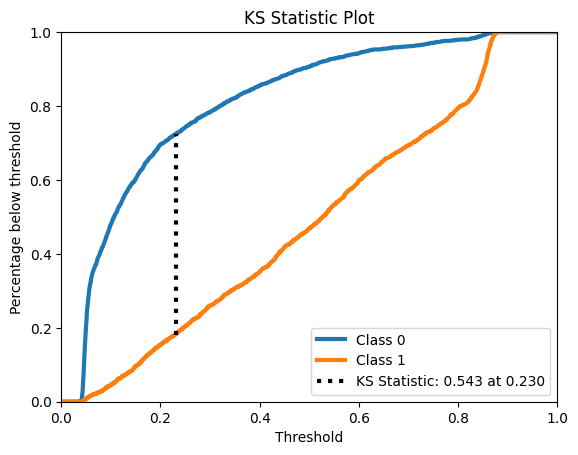

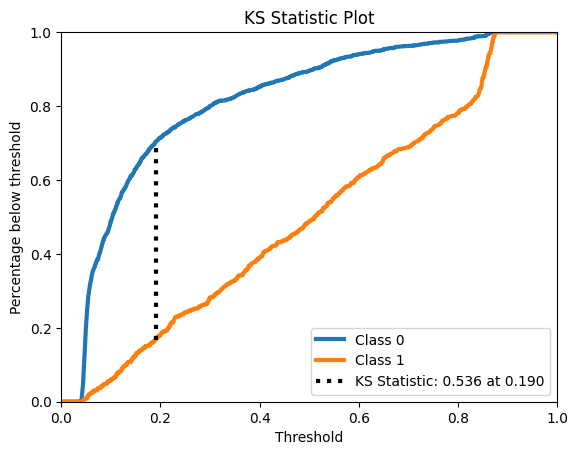

In [92]:
print('[Treinamento]')
y_pred = general_predict(model2, train_input_norm_dvc)
y_pred_proba = general_predict_proba(model2, train_input_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(train_label_norm_dvc), to_np(y_pred), to_np(y_pred_proba))

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

print('\n[Teste]')
y_pred = general_predict(model2, X_test2_norm_dvc)
y_pred_proba = general_predict_proba(model2, X_test2_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(y_test2_dvc), y_pred, y_pred_proba)

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

In [93]:
torch.save(model2.state_dict(), "STab2.pkl")

In [94]:
X_train3_norm_dvc = torch.Tensor(X_train3_norm.values).to(DEVICE)
y_train3_norm_dvc = torch.Tensor(y_train3_norm.values).type(torch.long).to(DEVICE)

X_val3_norm_dvc = torch.Tensor(X_val3_norm.values).to(DEVICE)
y_val3_dvc = torch.Tensor(y_val3.values).type(torch.long).to(DEVICE)

X_test3_norm_dvc = torch.Tensor(X_test3_norm.values).to(DEVICE)
y_test3_dvc = torch.Tensor(y_test3.values).type(torch.long).to(DEVICE)

train_input_norm_dvc = torch.cat([X_train3_norm_dvc, X_val3_norm_dvc], axis=0)
train_label_norm_dvc = torch.cat([y_train3_norm_dvc, y_val3_dvc], axis=0)
print(train_input_norm_dvc.shape)

torch.Size([5797, 19])


In [95]:
Or_model3 = STABModel(
        categories        = (),   # Sem features categóricas
        num_continuous    = 19,
        dim               = stab_params['dim'],
        dim_out           = 2,    # 2 classes
        depth             = stab_params['depth'],
        heads             = stab_params['heads'],
        attn_dropout      = stab_params['attn_dropout'],
        ff_dropout        = stab_params['ff_dropout'],
        U                 = 3,
        cases             = stab_params['cases'],
        dim_head          = stab_params['dim_head']
    )

# Criar o wrapper Num_Cat para gerenciar as entradas corretamente
no_model3 = Num_Cat(Or_model3, num_number=19, classes=2, Sample_size=16)  # 4 features numéricas, 3 classes (Iris)

# Passar o modelo para keras4torch
model3 = keras4torch.Model(no_model3).build([19])  # Agora só precisa da dimensão numérica

optimizer3 = torch.optim.AdamW(model3.parameters(), lr=0.01, weight_decay=0.005)
model3.compile(optimizer=optimizer3, loss=F.cross_entropy, device=DEVICE) # vou ter que fazer manualmente as outras métricas

# Treinamento (passando apenas X numérico)
model3.fit([train_input_norm_dvc], train_label_norm_dvc,  # Ajuste aqui: lista com X_train
        epochs=20, batch_size=16,
        validation_data=([X_test3_norm_dvc], y_test3_dvc),  # Ajuste aqui
        verbose=2)

Train on 5797 samples, validate on 2348 samples:
Epoch 1/20 - 48s - loss: 0.5666 - val_loss: 0.4718 - lr: 1e-02
Epoch 2/20 - 48s - loss: 0.5255 - val_loss: 0.4480 - lr: 1e-02
Epoch 3/20 - 49s - loss: 0.5174 - val_loss: 0.4749 - lr: 1e-02
Epoch 4/20 - 48s - loss: 0.5126 - val_loss: 0.4622 - lr: 1e-02
Epoch 5/20 - 48s - loss: 0.5070 - val_loss: 0.4402 - lr: 1e-02
Epoch 6/20 - 48s - loss: 0.5001 - val_loss: 0.4591 - lr: 1e-02
Epoch 7/20 - 48s - loss: 0.4961 - val_loss: 0.4698 - lr: 1e-02
Epoch 8/20 - 48s - loss: 0.4929 - val_loss: 0.4268 - lr: 1e-02
Epoch 9/20 - 48s - loss: 0.4912 - val_loss: 0.4585 - lr: 1e-02
Epoch 10/20 - 48s - loss: 0.4900 - val_loss: 0.5057 - lr: 1e-02
Epoch 11/20 - 48s - loss: 0.4927 - val_loss: 0.4500 - lr: 1e-02
Epoch 12/20 - 48s - loss: 0.4884 - val_loss: 0.4566 - lr: 1e-02
Epoch 13/20 - 48s - loss: 0.4907 - val_loss: 0.4231 - lr: 1e-02
Epoch 14/20 - 48s - loss: 0.4881 - val_loss: 0.4455 - lr: 1e-02
Epoch 15/20 - 48s - loss: 0.4887 - val_loss: 0.4331 - lr: 1e-02


,loss,val_loss,lr
1,0.566576,0.471786,0.01
2,0.525520,0.448036,0.01
3,0.517369,0.474947,0.01
4,0.512637,0.462187,0.01
5,0.507034,0.440217,0.01
6,0.500109,0.459141,0.01
7,0.496069,0.469800,0.01
8,0.492853,0.426849,0.01
9,0.491193,0.458481,0.01
10,0.490047,0.505681,0.01


[Treinamento]

Accuracy:         0.7776
Recall:           0.7279
Precision:        0.7245
F1:               0.7262
AUROC:            0.8568
AUPR:             0.7813

[Teste]

Accuracy:         0.7721
Recall:           0.7127
Precision:        0.5550
F1:               0.6240
AUROC:            0.8435
AUPR:             0.6358


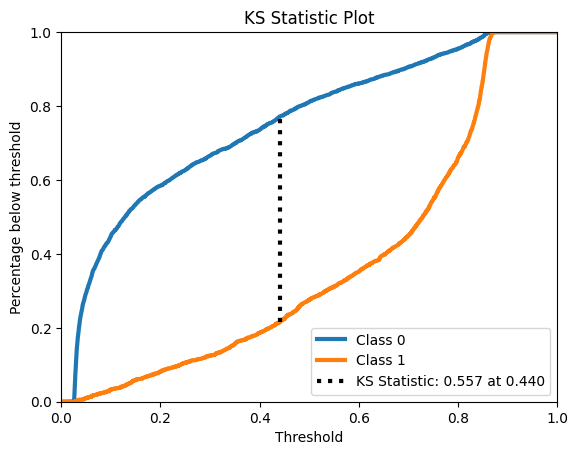

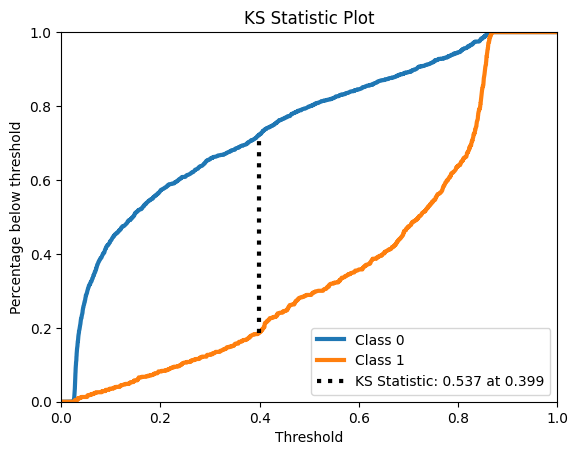

In [96]:
print('[Treinamento]')
y_pred = general_predict(model3, train_input_norm_dvc)
y_pred_proba = general_predict_proba(model3, train_input_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(train_label_norm_dvc), to_np(y_pred), to_np(y_pred_proba))

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

print('\n[Teste]')
y_pred = general_predict(model3, X_test3_norm_dvc)
y_pred_proba = general_predict_proba(model3, X_test3_norm_dvc)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr = compute_performance_metrics(to_np(y_test3_dvc), y_pred, y_pred_proba)

print_metrics_summary(stab_acc, stab_recall, stab_prec, stab_f1, stab_auroc, stab_aupr)

In [97]:
torch.save(model3.state_dict(), "STab3.pkl")

In [ ]:
y_pred = general_predict(model, X_test1_norm_dvc)
y_pred

tensor([1, 0, 1,  ..., 0, 0, 1])

In [ ]:
to_np(y_test1_dvc)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
f1_score(to_np(y_test1_dvc), y_pred)

0.6187576126674786

In [ ]:
def data2cpu(y_pred, y_true):
    y_pred = torch.tensor(y_pred[:,1]).cpu().numpy()
    y_true = torch.tensor(y_true).cpu().numpy()
    return y_pred, y_true

def accuracy(y_pred, y_true):
    y_pred, y_true = data2cpu(y_pred, y_true)
    return torch.tensor((y_pred == y_true).sum(), dtype=torch.float32, device='cpu')

def precision(y_pred, y_true): # vp / p_hat
    y_pred, y_true = data2cpu(y_pred, y_true)
    return torch.tensor(precision_score(y_true, y_pred, zero_division=0), dtype=torch.float32, device='cpu')
    #return ((y_pred & y_true).sum() / y_pred.sum()).float()

def recall(y_pred, y_true): # vp / p
    y_pred, y_true = data2cpu(y_pred, y_true)
    return torch.tensor(recall_score(y_true, y_pred, zero_division=0), dtype=torch.float32, device='cpu')
    #return ((y_pred & y_true).sum() / y_true.sum()).float()

def f1_score(y_pred, y_true):
    y_pred, y_true = data2cpu(y_pred, y_true)
    return torch.tensor(f1_score(y_true, y_pred), dtype=torch.float32, device='cpu')

### TabKANet

- output_dim: int = 2 (número de dimensões do output / número de classes)
- vocabulary: Dict[str, Dict[str, int]] = {} (vocabulário?)
- num_continuous_features: int =  (número de variáveis contínuas)
- embedding_dim: int = (dimensão do embedding) [como não tem variáveis categóricas, considerar isso só para as contínuas]
- nhead: int (número de cabeças do encoder)
- num_layers: int (número de camadas de encoder)
- dim_feedforward: int (dimensão da rede feedforward)
- attn_dropout_rate: float (taxa de dropout do encoder)
- mlp_hidden_dims: List[int] (número de camadas ocultas da mlp final)
- activation: str (função de ativação da mlp final)
- ffn_dropout_rate: float (taxa de dropout da mlp final)

In [ ]:
train_input_norm = pd.concat([X_train1_norm, X_val1_norm], ignore_index=True)
train_label_norm = pd.concat([y_train1_norm, y_val1], ignore_index=True)

In [ ]:
from typing import Optional, Callable, Tuple, Literal, Union, Dict, List
from tabkanet.dataset import TabularDataset
from tqdm import tqdm
import logging

def get_dataset(train_data: pd.DataFrame, val_data: Optional[pd.DataFrame], test_data,
                    target_name: str, target_dtype: Union[Literal['regression', 'classification'], torch.dtype],
                    categorical_features: Optional[List[str]], continuous_features: Optional[List[str]]) \
                        -> Tuple[TabularDataset, TabularDataset, TabularDataset]:
    """
    Get the train, test and validation datasets from pandas DataFrames to TabularDataset

    Parameters:
    - train_data (pd.DataFrame): Train data
    - test_data (pd.DataFrame): Test data
    - val_data (Optional[pd.DataFrame]): Validation data
    - target_name (str): Target column name
    - target_dtype (Union[Literal['regression', 'classification'], torch.dtype]): Target data type
    - categorical_features (Optional[List[str]]): Categorical feature column names
    - continuous_features (Optional[List[str]]): Continuous feature column names

    Returns:
    - Tuple[TabularDataset, TabularDataset, TabularDataset]: Train, test and validation datasets
    """
    train_dataset = TabularDataset(train_data, target_name, target_dtype, categorical_features, continuous_features)
    val_dataset = TabularDataset(val_data, target_name, target_dtype, categorical_features, continuous_features)
    test_dataset = TabularDataset(test_data, target_name, target_dtype, categorical_features, continuous_features)
    return train_dataset, val_dataset, test_dataset#, val_dataset

def get_data_loader(train_dataset, val_dataset, test_dataset,
                    train_batch_size: int, inference_batch_size: int) -> Tuple[DataLoader, DataLoader, DataLoader]:
    """
    Get the train, test and validation data loaders from TabularDataset

    Parameters:
    - train_dataset (TabularDataset): Train dataset
    - test_dataset (TabularDataset): Test dataset
    - val_dataset (TabularDataset): Validation dataset
    - train_batch_size (int): Batch size for training
    - inference_batch_size (int): Batch size for inference

    Returns:
    - Tuple[DataLoader, DataLoader, DataLoader]: Train, test and validation data loaders
    """
    train_loader = DataLoader(train_dataset, batch_size=train_batch_size,num_workers=12, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=inference_batch_size, num_workers=12,shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=inference_batch_size,num_workers=12, shuffle=False)
    return train_loader, val_loader, test_loader#, val_loader

def train(model: torch.nn.Module, epochs: int,
                    train_loader: DataLoader, val_loader: DataLoader, test_loader: DataLoader,
                    optimizer: torch.optim.Optimizer, criterion: torch.nn.modules.loss._Loss,
                    scheduler: Optional[torch.optim.lr_scheduler._LRScheduler]=None,
                    custom_metric: Optional[Callable[[Tuple[np.ndarray, np.ndarray]], float]]=None,
                    maximize: bool=False, scheduler_custom_metric:bool=False,
                    early_stopping_patience=5, early_stopping_start_from:int=0, gpu_num:int=1,
                    save_model_path: Optional[str]=None, verbose:int=0):
    """
    Train the model

    Parameters:
    - model (torch.nn.Module): Model to be trained
    - epochs (int): Number of epochs
    - task (Literal['regression', 'classification']): Task type
    - train_loader (DataLoader): Train data loader
    - val_loader (DataLoader): Validation data loader
    - optimizer (torch.optim.Optimizer): Optimizer
    - criterion (torch.nn.modules.loss._Loss): Loss function
    - scheduler (Optional[torch.optim.lr_scheduler._LRScheduler]): Learning rate scheduler
    - custom_metric (Optional[Callable[[Tuple[np.ndarray, np.ndarray]], float]]): Custom metric function
    - maximize (bool): Whether to maximize the custom metric
    - scheduler_custom_metric (bool): Whether to use custom metric for scheduler
    - early_stopping_patience (int): Early stopping patience
    - early_stopping_start_from (int): Start early stopping from this epoch
    - save_model_path (Optional[str]): Path to save the model

    Returns:
    - Tuple[List[float], List[float]]: Training and validation loss history
    """
    # device = get_device()
    best_auc=0.0

    device = torch.device("cuda:"+str(gpu_num) if torch.cuda.is_available() else "cpu")

    logging.info(f'Device: {device}')

    best_metric = float('inf') if not maximize else float('-inf')
    best_model_params = None
    train_loss_history = []
    val_loss_history = []
    test_loss_history = []

    early_stopping_counter = 0

    model.train()
    model.to(device)
    for epoch in range(epochs):#tqdm(range(epochs), desc='Epochs'):
        total_loss = 0
        train_loader_tqdm = enumerate(train_loader)#tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}/{epochs}')
        for batch_idx, (categorical_data, continuous_data, target) in train_loader_tqdm:
            categorical_data = categorical_data.to(device)
            continuous_data = continuous_data.to(device)
            #if task == 'regression':
            #    target = target.unsqueeze(1)
            target = target.to(device)
            optimizer.zero_grad()

            if device.type == 'cuda':
                with torch.cuda.amp.autocast():
                    output = model(categorical_data, continuous_data)
                    loss = criterion(output, target)
            else:
                output = model(categorical_data, continuous_data)
                loss = criterion(output, target)
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            #train_loader_tqdm.set_postfix(loss=total_loss / (batch_idx + 1))

        train_loss = total_loss / len(train_loader)
        train_loss_history.append(train_loss)

        with torch.no_grad():
                model.eval()
                val_loss = 0
                y_true = []
                y_pred = []
                predictions = []

                for _, (categorical_data, continuous_data, target) in enumerate(val_loader):
                    categorical_data = categorical_data.to(device)
                    continuous_data = continuous_data.to(device)
                    #if task == 'regression':
                    #    y_true.extend(target.cpu().numpy().reshape(-1).tolist())
                    #    target = target.unsqueeze(1)
                    #elif task == 'classification':
                    y_true = np.concatenate([y_true, target.cpu().numpy()])

                    target = target.to(device)
                    output = model(categorical_data, continuous_data)

                    #if task == 'regression':
                    #    y_pred.extend(output.cpu().numpy().reshape(-1).tolist())
                    #elif task == 'classification':
                    probabilities = torch.sigmoid(output)
                    positive_class_probabilities = probabilities[:, 1]
                    predictions.extend(probabilities[:, 1].tolist())
                    y_pred = np.concatenate([y_pred, torch.argmax(output, dim=1).cpu().numpy()])

                    loss = criterion(output, target)
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

                    val_loss += loss.item()
                val_loss /= len(val_loader)
                val_metric = custom_metric(y_true, y_pred) if custom_metric is not None else val_loss
                val_auc = roc_auc_score(y_score=predictions, y_true=y_true)
                if val_auc>best_auc:
                    best_auc=val_auc

                    if save_model_path is not None:
                        torch.save(model.state_dict(), save_model_path)
                        logging.info('Model saved')
                if scheduler is not None:
                    if scheduler_custom_metric:
                        scheduler.step(val_metric)
                    else:
                        scheduler.step(val_loss)

                val_loss_history.append(val_loss)

        with torch.no_grad():
                model.eval()
                test_loss = 0
                y_true = []
                y_pred = []
                predictions = []
                for _, (categorical_data, continuous_data, target) in enumerate(test_loader):
                    categorical_data = categorical_data.to(device)
                    continuous_data = continuous_data.to(device)
                    if task == 'regression':
                        y_true.extend(target.cpu().numpy().reshape(-1).tolist())
                        target = target.unsqueeze(1)
                    elif task == 'classification':
                        y_true = np.concatenate([y_true, target.cpu().numpy()])
                    target = target.to(device)
                    output = model(categorical_data, continuous_data)
                    if task == 'regression':
                        y_pred.extend(output.cpu().numpy().reshape(-1).tolist())
                    elif task == 'classification':
                        y_pred = np.concatenate([y_pred, torch.argmax(output, dim=1).cpu().numpy()])
                        probabilities = torch.sigmoid(output)
                        positive_class_probabilities = probabilities[:, 1]
                        predictions.extend(probabilities[:, 1].tolist())
                    loss = criterion(output, target)
                    test_loss += loss.item()
                test_loss /= len(test_loader)
                test_metric = custom_metric(y_true, y_pred) if custom_metric is not None else test_loss
                test_auc = roc_auc_score(y_score=predictions, y_true=y_true)
                test_loss_history.append(test_loss)
        if (custom_metric is not None) and (verbose>=1):
            tqdm.write(f'Epoch: {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f},Val AUC:{val_auc:.4f}, Val Metric: {val_metric:.4f}')#, Test Metric: {test_metric:.4f} , Test AUC: {test_auc:.4f}')
        elif(verbose>=1):
            tqdm.write(f'Epoch: {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

        if not custom_metric:
            maximize = False
        if not maximize and val_metric < best_metric:
            best_metric = val_metric
            best_model_params = model.state_dict()
            early_stopping_counter = 0
        elif maximize and val_metric > best_metric:
            best_metric = val_metric
            best_model_params = model.state_dict()
            early_stopping_counter = 0
        else:
            if epoch >= early_stopping_start_from:
                early_stopping_counter += 1
            if early_stopping_counter == early_stopping_patience:
                if(verbose>=1):
                    tqdm.write('Early stopping')
                break
    model.load_state_dict(best_model_params)


    print(f"FINISHED TRAINING, BEST VAL AUC:{best_auc:.4f}")


    return train_loss_history,val_loss_history,test_loss_history

In [ ]:
# Função para calcular os bins
def get_quantile_bins(x_cont, n_bins=4):
    feature_dim = x_cont.shape[1]
    bins = torch.zeros(feature_dim, n_bins + 1)
    for i in range(feature_dim):
        # Converta a coluna específica para tensor e depois calcule os quantis
        quantiles = torch.quantile(torch.tensor(x_cont.iloc[:, i].values, dtype=torch.float32), torch.linspace(0, 1, n_bins + 1))
        bins[i] = quantiles#.to(DEVICE) # a própria função train() já faz as conversões para a GPU
    return bins

In [ ]:
# Definir features
continuous_features = list(X_train1_norm.columns)
categorical_features = []
target_name = "Churn"
task = "classification"

# Criar datasets
tabkanet_train = pd.concat([X_train1_norm, y_train1_norm], axis=1)
tabkanet_val = pd.concat([X_val1_norm, y_val1], axis=1)
tabkanet_test = pd.concat([X_test1_norm, y_test1], axis=1)

dataset_train, dataset_val, dataset_test = get_dataset(
        tabkanet_train, tabkanet_val, tabkanet_test, target_name, task, categorical_features, continuous_features
    )

dataloader_train, dataloader_val, dataloader_test = get_data_loader(
    dataset_train, dataset_val, dataset_test, train_batch_size=32, inference_batch_size=32
)

# Calcular bins
bins = get_quantile_bins(X_train1_norm)

In [57]:
# 1. Define an objective function to be maximized.
def tabkanet_objective(trial:optuna.trial._trial.Trial):

    # 2. Suggest values for the hyperparameters using a trial object.
    activation = trial.suggest_categorical('activation', ['relu'])
    attn_dropout = trial.suggest_float('attn_dropout', 0.01, 0.9)
    ffn_dropout = trial.suggest_float('ffn_dropout', 0.01, 0.9)
    mlp_num_layers = trial.suggest_int('mlp_num_layers', 1, 2, step=1)
    mlp_hidden_layers1 = trial.suggest_int('mlp_hidden_layers1', 8, 40, step=8)
    mlp_hidden_layers = [mlp_hidden_layers1]
    if(mlp_num_layers == 2):
        mlp_hidden_layers.append(trial.suggest_int('mlp_hidden_layers2', 8, 40, step=8))
    nhead = trial.suggest_categorical('nhead', [2,4,8])
    lr = trial.suggest_categorical('opt-lr', [0.0001, 0.001, 0.01, 0.1])
    weight_decay = trial.suggest_categorical('opt-weight_decay', [0.0001, 0.001, 0.005])
    num_layers = trial.suggest_int('num_layers', 2, 6, step=1)
    embedding_dim = trial.suggest_int('embedding_dim', 8, 32, step=8)
    dim_feedforward = trial.suggest_categorical('dim_feedforward', [128, 256, 512])

    # Definir o modelo
    model = TabKANet(
        output_dim=2,  # 2 classes (binário)
        vocabulary={},
        num_continuous_features=len(continuous_features),
        embedding_dim=embedding_dim,
        mlp_hidden_dims=mlp_hidden_layers,
        activation=activation,
        ffn_dropout_rate=ffn_dropout,
        nhead=nhead,
        num_layers=num_layers,
        dim_feedforward=dim_feedforward,
        attn_dropout_rate=attn_dropout,
        learninable_noise=True,
        bins=bins
    )

    # Definir otimizador e loss
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Treinar o modelo
    _, _, _ = train(
        model, epochs=20, train_loader=dataloader_train, val_loader=dataloader_val, test_loader=dataloader_test,
        optimizer=optimizer, criterion=criterion,
        custom_metric=f1_score_macro, maximize=True, early_stopping_patience=20, gpu_num=0
    )

    y_pred_proba = torch.softmax(model(torch.Tensor([]), torch.Tensor(X_val1_norm.values).to(DEVICE)), dim=1)

    score, _ = ks_score(np.asarray(y_val1), y_pred_proba.cpu().detach())

    return score

# 3. Create a study object and optimize the objective function.
tabkanet_study = optuna.create_study(direction='maximize')
tabkanet_study.optimize(tabkanet_objective, n_trials=10)
print(tabkanet_study.best_trial)

[I 2025-04-13 22:42:38,356] A new study created in memory with name: no-name-d7b749e9-ae20-4f5e-b1f8-a4b5147667a4
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is

FINISHED TRAINING, BEST VAL AUC:0.8400


[I 2025-04-13 22:57:44,753] Trial 0 finished with value: 0.5200279154162887 and parameters: {'activation': 'relu', 'attn_dropout': 0.3989816491184076, 'ffn_dropout': 0.0656576235339466, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 40, 'nhead': 2, 'opt-lr': 0.01, 'opt-weight_decay': 0.0001, 'num_layers': 3, 'embedding_dim': 32, 'dim_feedforward': 256}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

FINISHED TRAINING, BEST VAL AUC:0.5000


[I 2025-04-13 23:15:44,384] Trial 1 finished with value: 0.0 and parameters: {'activation': 'relu', 'attn_dropout': 0.2993948283011512, 'ffn_dropout': 0.48576224401105317, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 16, 'nhead': 2, 'opt-lr': 0.1, 'opt-weight_decay': 0.005, 'num_layers': 6, 'embedding_dim': 16, 'dim_feedforward': 512}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-inpu

FINISHED TRAINING, BEST VAL AUC:0.8395


[I 2025-04-13 23:31:07,203] Trial 2 finished with value: 0.5068667271500686 and parameters: {'activation': 'relu', 'attn_dropout': 0.14294427075225866, 'ffn_dropout': 0.5614016848547209, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 16, 'nhead': 8, 'opt-lr': 0.01, 'opt-weight_decay': 0.0001, 'num_layers': 3, 'embedding_dim': 8, 'dim_feedforward': 256}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

FINISHED TRAINING, BEST VAL AUC:0.5000


[I 2025-04-13 23:48:35,489] Trial 3 finished with value: 0.0 and parameters: {'activation': 'relu', 'attn_dropout': 0.45284909073543045, 'ffn_dropout': 0.8474669134763728, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 32, 'nhead': 4, 'opt-lr': 0.1, 'opt-weight_decay': 0.001, 'num_layers': 5, 'embedding_dim': 8, 'dim_feedforward': 256}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input

FINISHED TRAINING, BEST VAL AUC:0.5000


[I 2025-04-14 00:03:43,454] Trial 4 finished with value: 0.0 and parameters: {'activation': 'relu', 'attn_dropout': 0.7331562271691955, 'ffn_dropout': 0.31387090790746347, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 40, 'nhead': 2, 'opt-lr': 0.1, 'opt-weight_decay': 0.005, 'num_layers': 3, 'embedding_dim': 32, 'dim_feedforward': 256}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-inpu

FINISHED TRAINING, BEST VAL AUC:0.8211


[I 2025-04-14 00:22:30,747] Trial 5 finished with value: 0.4557266150231465 and parameters: {'activation': 'relu', 'attn_dropout': 0.13453484142060623, 'ffn_dropout': 0.8467671190916272, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 16, 'mlp_hidden_layers2': 24, 'nhead': 4, 'opt-lr': 0.0001, 'opt-weight_decay': 0.001, 'num_layers': 6, 'embedding_dim': 24, 'dim_feedforward': 128}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  w

FINISHED TRAINING, BEST VAL AUC:0.8396


[I 2025-04-14 00:38:07,092] Trial 6 finished with value: 0.4895135738711704 and parameters: {'activation': 'relu', 'attn_dropout': 0.6905501174009356, 'ffn_dropout': 0.10422974184000407, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 40, 'mlp_hidden_layers2': 32, 'nhead': 4, 'opt-lr': 0.01, 'opt-weight_decay': 0.0001, 'num_layers': 3, 'embedding_dim': 8, 'dim_feedforward': 256}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  wit

FINISHED TRAINING, BEST VAL AUC:0.8254


[I 2025-04-14 00:55:48,732] Trial 7 finished with value: 0.4530904692116221 and parameters: {'activation': 'relu', 'attn_dropout': 0.2665323598938105, 'ffn_dropout': 0.5508432702111885, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 40, 'mlp_hidden_layers2': 24, 'nhead': 4, 'opt-lr': 0.001, 'opt-weight_decay': 0.001, 'num_layers': 5, 'embedding_dim': 16, 'dim_feedforward': 128}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  wit

FINISHED TRAINING, BEST VAL AUC:0.8226


[I 2025-04-14 01:10:18,224] Trial 8 finished with value: 0.4433340312187406 and parameters: {'activation': 'relu', 'attn_dropout': 0.8931225477166854, 'ffn_dropout': 0.40007796798791834, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 32, 'mlp_hidden_layers2': 8, 'nhead': 8, 'opt-lr': 0.0001, 'opt-weight_decay': 0.001, 'num_layers': 2, 'embedding_dim': 32, 'dim_feedforward': 128}. Best is trial 0 with value: 0.5200279154162887.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  wi

FINISHED TRAINING, BEST VAL AUC:0.5000


[I 2025-04-14 01:28:52,325] Trial 9 finished with value: 0.0 and parameters: {'activation': 'relu', 'attn_dropout': 0.48404752483906344, 'ffn_dropout': 0.3961666499649498, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 24, 'nhead': 4, 'opt-lr': 0.1, 'opt-weight_decay': 0.0001, 'num_layers': 6, 'embedding_dim': 16, 'dim_feedforward': 128}. Best is trial 0 with value: 0.5200279154162887.


FrozenTrial(number=0, state=1, values=[0.5200279154162887], datetime_start=datetime.datetime(2025, 4, 13, 22, 42, 38, 357697), datetime_complete=datetime.datetime(2025, 4, 13, 22, 57, 44, 753490), params={'activation': 'relu', 'attn_dropout': 0.3989816491184076, 'ffn_dropout': 0.0656576235339466, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 40, 'nhead': 2, 'opt-lr': 0.01, 'opt-weight_decay': 0.0001, 'num_layers': 3, 'embedding_dim': 32, 'dim_feedforward': 256}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'activation': CategoricalDistribution(choices=('relu',)), 'attn_dropout': FloatDistribution(high=0.9, log=False, low=0.01, step=None), 'ffn_dropout': FloatDistribution(high=0.9, log=False, low=0.01, step=None), 'mlp_num_layers': IntDistribution(high=2, log=False, low=1, step=1), 'mlp_hidden_layers1': IntDistribution(high=40, log=False, low=8, step=8), 'nhead': CategoricalDistribution(choices=(2, 4, 8)), 'opt-lr': CategoricalDistribution(choices=(0.0001, 0.001, 

In [58]:
tabkanet_study.best_params

{'activation': 'relu',
 'attn_dropout': 0.3989816491184076,
 'ffn_dropout': 0.0656576235339466,
 'mlp_num_layers': 1,
 'mlp_hidden_layers1': 40,
 'nhead': 2,
 'opt-lr': 0.01,
 'opt-weight_decay': 0.0001,
 'num_layers': 3,
 'embedding_dim': 32,
 'dim_feedforward': 256}

'activation': 'relu', 'attn_dropout': 0.6794862967378213, 'ffn_dropout': 0.25104533746088703, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 40, 'mlp_hidden_layers2': 32, 'nhead': 4, 'opt-lr': 0.01, 'opt-weight_decay': 0.001, 'num_layers': 2, 'embedding_dim': 32, 'dim_feedforward': 128

In [ ]:
#dataloader_test

data_iter = iter(dataloader_test)
data = next(data_iter)

In [ ]:
data

[tensor([], size=(32, 0), dtype=torch.int64),
 tensor([[1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
          2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
          1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.7778e-02, 5.4973e-01,
          1.7258e-02],
         [1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
          2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
          2.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 4.5833e-01, 8.5157e-01,
          3.9894e-01],
         [1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
          1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
          1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.3889e-02, 2.5787e-01,
          5.2642e-03],
         [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e

antes: 'activation': 'relu', 'attn_dropout': 0.6271401674911775, 'ffn_dropout': 0.804645915876618, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 24, 'mlp_hidden_layers2': 16, 'nhead': 4, 'opt-lr': 0.1, 'opt-weight_decay': 0.0001, 'num_layers': 5, 'embedding_dim': 24, 'dim_feedforward': 512

'activation': 'relu', 'attn_dropout': 0.6794862967378213, 'ffn_dropout': 0.25104533746088703, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 32, 'mlp_hidden_layers2': 16, 'nhead': 4, 'opt-lr': 0.01, 'opt-weight_decay': 0.001, 'num_layers': 2, 'embedding_dim': 32, 'dim_feedforward': 128

In [ ]:
tabkan_params = {'activation': 'relu', 'attn_dropout': 0.6794862967378213, 'ffn_dropout': 0.25104533746088703, 'mlp_num_layers': 2, 'mlp_hidden_layers1': 32, 'mlp_hidden_layers2': 16, 'nhead': 4, 'opt-lr': 0.01, 'opt-weight_decay': 0.001, 'num_layers': 2, 'embedding_dim': 32, 'dim_feedforward': 128}

In [65]:
import json

In [64]:
with open('tabkanet.json', 'w') as f:
    json.dump(tabkanet_study.best_params, f)

NameError: name 'json' is not defined

'activation': 'relu', 'attn_dropout': 0.7313862830684534, 'ffn_dropout': 0.8743911777174741, 'mlp_num_layers': 1, 'mlp_hidden_layers1': 8, 'nhead': 4, 'opt-lr': 0.0001, 'opt-weight_decay': 0.005, 'num_layers': 6, 'embedding_dim': 24, 'dim_feedforward': 128

{'activation': 'relu',
 'attn_dropout': 0.3989816491184076,
 'ffn_dropout': 0.0656576235339466,
 'mlp_num_layers': 1,
 'mlp_hidden_layers1': 40,
 'nhead': 2,
 'opt-lr': 0.01,
 'opt-weight_decay': 0.0001,
 'num_layers': 3,
 'embedding_dim': 32,
 'dim_feedforward': 256}

In [68]:
# Definir features
#train_input = pd.concat([X_train1, X_val1], ignore_index=True)
#train_label = pd.concat([y_train1, y_val1], ignore_index=True)

train_input_norm = pd.concat([X_train1_norm, X_val1_norm], ignore_index=True)
train_label_norm = pd.concat([y_train1_norm, y_val1], ignore_index=True)

continuous_features = list(X_train1_norm.columns)
categorical_features = []
target_name = "Churn"
task = "classification"

# Criar datasets
tabkanet_train = pd.concat([train_input_norm, train_label_norm], axis=1)
#tabkanet_val = pd.concat([X_val1_norm, y_val1], axis=1)
tabkanet_test = pd.concat([X_test1_norm, y_test1], axis=1)

dataset_train, _, dataset_test = get_dataset(
        tabkanet_train, tabkanet_test, tabkanet_test, target_name, task, categorical_features, continuous_features
    )

dataloader_train, _, dataloader_test = get_data_loader(
    dataset_train, dataset_test, dataset_test, train_batch_size=32, inference_batch_size=32
)

# Calcular bins
bins = get_quantile_bins(X_train1_norm)

#mlp_hidden_dims = [tabkanet_study.best_params['mlp_hidden_layers1']]
#if(tabkanet_study.best_params['mlp_num_layers']==2):
#    mlp_hidden_dims.append(tabkanet_study.best_params['mlp_hidden_layers2'])

# Definir o modelo
tabkanet_model = TabKANet(
    output_dim=2,  # 2 classes (binário)
    vocabulary={},
    num_continuous_features=len(continuous_features),
    embedding_dim=24,#tabkanet_study.best_params['embedding_dim'],
    mlp_hidden_dims=[tabkanet_study.best_params['mlp_hidden_layers1']],#mlp_hidden_dims,
    activation=tabkanet_study.best_params['activation'],
    ffn_dropout_rate=tabkanet_study.best_params['ffn_dropout'],
    nhead=tabkanet_study.best_params['nhead'],
    num_layers=tabkanet_study.best_params['num_layers'],
    dim_feedforward=tabkanet_study.best_params['dim_feedforward'],#128,
    attn_dropout_rate=tabkanet_study.best_params['attn_dropout'],
    learninable_noise=True,
    bins=bins
)

# Definir otimizador e loss
optimizer = torch.optim.AdamW(tabkanet_model.parameters(), lr=tabkanet_study.best_params['opt-lr'],
                              weight_decay=tabkanet_study.best_params['opt-weight_decay']
                              )
criterion = torch.nn.CrossEntropyLoss()

# Treinar o modelo
train_history, _, test_history = train(
    tabkanet_model, epochs=30, train_loader=dataloader_train, val_loader=dataloader_test,
    optimizer=optimizer, criterion=criterion, test_loader=dataloader_test,
    custom_metric=f1_score_macro, maximize=True, early_stopping_patience=5, gpu_num=0, verbose=1
)

torch.save(tabkanet_model.state_dict(), 'tabkanet.pkl')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 0, Train Loss: 0.4690, Val Loss: 0.4481,Val AUC:0.8400, Val Metric: 0.7402


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 1, Train Loss: 0.5319, Val Loss: 0.4558,Val AUC:0.8450, Val Metric: 0.7477


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 2, Train Loss: 0.4679, Val Loss: 0.4706,Val AUC:0.8298, Val Metric: 0.7121


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 3, Train Loss: 0.5016, Val Loss: 0.4438,Val AUC:0.8482, Val Metric: 0.7308


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 4, Train Loss: 0.5209, Val Loss: 0.4567,Val AUC:0.8351, Val Metric: 0.7237


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 5, Train Loss: 0.3987, Val Loss: 0.4344,Val AUC:0.8407, Val Metric: 0.7306


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 6, Train Loss: 0.5277, Val Loss: 0.4328,Val AUC:0.8436, Val Metric: 0.7450
Early stopping
FINISHED TRAINING, BEST VAL AUC:0.8482


In [ ]:
tabkanet_model(torch.Tensor([]), torch.Tensor(X_test1_norm.values).to(DEVICE))

tensor([[ 0.0785, -0.1889],
        [ 0.0785, -0.1889],
        [ 0.0785, -0.1889],
        ...,
        [ 0.0785, -0.1889],
        [ 0.0785, -0.1889],
        [ 0.0785, -0.1889]], device='cuda:0', grad_fn=<AddmmBackward0>)

[Treinamento]

Accuracy:         0.7795
Recall:           0.6863
Precision:        0.7483
F1:               0.7159
AUROC:            0.8646
AUPR:             0.8003

[Teste]

Accuracy:         0.7947
Recall:           0.6645
Precision:        0.6026
F1:               0.6321
AUROC:            0.8439
AUPR:             0.6502


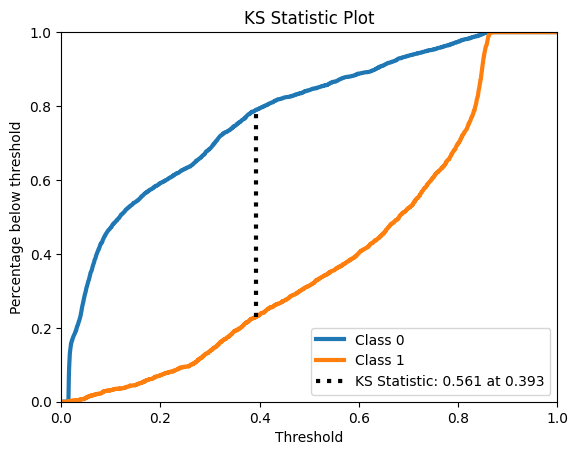

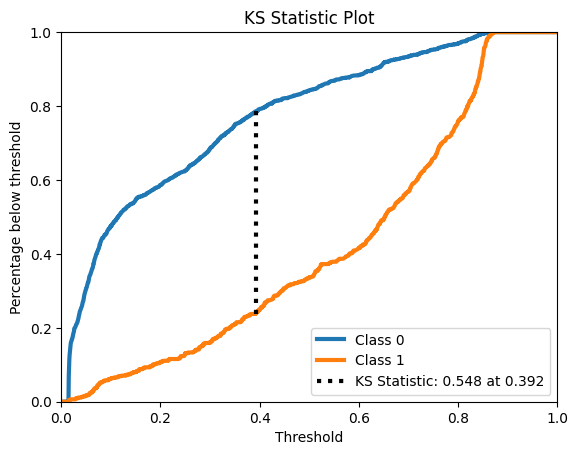

In [69]:
print('[Treinamento]')
y_pred_proba = torch.softmax(tabkanet_model(torch.Tensor([]), torch.Tensor(train_input_norm.values).to(DEVICE)), dim=1)
y_pred = torch.argmax(y_pred_proba, dim=1)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr = compute_performance_metrics(np.asarray(train_label_norm),
                                                                                                                       y_pred.cpu().numpy(),
                                                                                                                       to_np(y_pred_proba))

print_metrics_summary(tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr)

print('\n[Teste]')
y_pred_proba = torch.softmax(tabkanet_model(torch.Tensor([]), X_test1_norm_dvc), dim=1)
y_pred = torch.argmax(y_pred_proba, dim=1)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr = compute_performance_metrics(np.asarray(y_test1), y_pred.cpu().numpy(), to_np(y_pred_proba))

print_metrics_summary(tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr)

In [75]:
loss_hist = pd.DataFrame()
loss_hist['train'] = train_history
loss_hist['test'] = test_history
plt.title('TabKANet - Loss over time')
sns.lineplot(loss_hist)

<Axes: title={'center': 'TabKANet - Loss over time'}>

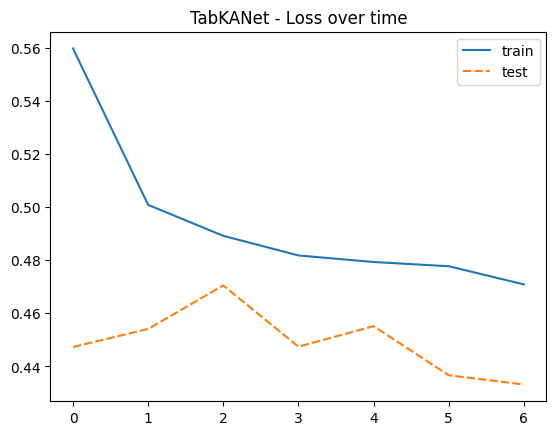

In [77]:
plt.title('TabKANet - Loss over time') # esqueci de mudar o título
sns.lineplot(loss_hist)

In [73]:
type(test_history)

list

In [78]:
# Definir features
#train_input = pd.concat([X_train1, X_val1], ignore_index=True)
#train_label = pd.concat([y_train1, y_val1], ignore_index=True)

train_input_norm = pd.concat([X_train2_norm, X_val2_norm], ignore_index=True)
train_label_norm = pd.concat([y_train2_norm, y_val2], ignore_index=True)

continuous_features = list(X_train2_norm.columns)
categorical_features = []
target_name = "Churn"
task = "classification"

# Criar datasets
tabkanet_train = pd.concat([train_input_norm, train_label_norm], axis=1)
#tabkanet_val = pd.concat([X_val1_norm, y_val1], axis=1)
tabkanet_test = pd.concat([X_test2_norm, y_test2], axis=1)

dataset_train, _, dataset_test = get_dataset(
        tabkanet_train, tabkanet_test, tabkanet_test, target_name, task, categorical_features, continuous_features
    )

dataloader_train, _, dataloader_test = get_data_loader(
    dataset_train, dataset_test, dataset_test, train_batch_size=32, inference_batch_size=32
)

# Calcular bins
bins = get_quantile_bins(X_train2_norm)

#mlp_hidden_dims = [tabkanet_study.best_params['mlp_hidden_layers1']]
#if(tabkanet_study.best_params['mlp_num_layers']==2):
#    mlp_hidden_dims.append(tabkanet_study.best_params['mlp_hidden_layers2'])

# Definir o modelo
tabkanet_model = TabKANet(
    output_dim=2,  # 2 classes (binário)
    vocabulary={},
    num_continuous_features=len(continuous_features),
    embedding_dim=24,#tabkanet_study.best_params['embedding_dim'],
    mlp_hidden_dims=[tabkanet_study.best_params['mlp_hidden_layers1']],#mlp_hidden_dims,
    activation=tabkanet_study.best_params['activation'],
    ffn_dropout_rate=tabkanet_study.best_params['ffn_dropout'],
    nhead=tabkanet_study.best_params['nhead'],
    num_layers=tabkanet_study.best_params['num_layers'],
    dim_feedforward=tabkanet_study.best_params['dim_feedforward'],#128,
    attn_dropout_rate=tabkanet_study.best_params['attn_dropout'],
    learninable_noise=True,
    bins=bins
)

# Definir otimizador e loss
optimizer = torch.optim.AdamW(tabkanet_model.parameters(), lr=tabkanet_study.best_params['opt-lr'],
                              weight_decay=tabkanet_study.best_params['opt-weight_decay']
                              )
criterion = torch.nn.CrossEntropyLoss()

# Treinar o modelo
train_history, _, test_history = train(
    tabkanet_model, epochs=30, train_loader=dataloader_train, val_loader=dataloader_test,
    optimizer=optimizer, criterion=criterion, test_loader=dataloader_test,
    custom_metric=f1_score_macro, maximize=True, early_stopping_patience=5, gpu_num=0, verbose=1
)

torch.save(tabkanet_model.state_dict(), 'tabkanet2.pkl')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 0, Train Loss: 0.2081, Val Loss: 0.4804,Val AUC:0.8320, Val Metric: 0.7283


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 1, Train Loss: 0.2465, Val Loss: 0.4670,Val AUC:0.8417, Val Metric: 0.7292


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 2, Train Loss: 0.0803, Val Loss: 0.4387,Val AUC:0.8247, Val Metric: 0.7080


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 3, Train Loss: 0.1297, Val Loss: 0.4315,Val AUC:0.8402, Val Metric: 0.7275


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 4, Train Loss: 0.1558, Val Loss: 0.4979,Val AUC:0.8343, Val Metric: 0.7351


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 5, Train Loss: 0.1575, Val Loss: 0.4422,Val AUC:0.8361, Val Metric: 0.7309


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 6, Train Loss: 0.0905, Val Loss: 0.4749,Val AUC:0.8313, Val Metric: 0.7366


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 7, Train Loss: 0.1278, Val Loss: 0.4460,Val AUC:0.8327, Val Metric: 0.7243


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 8, Train Loss: 0.1921, Val Loss: 0.4510,Val AUC:0.8351, Val Metric: 0.7264


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 9, Train Loss: 0.1476, Val Loss: 0.4299,Val AUC:0.8360, Val Metric: 0.7347


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 10, Train Loss: 0.1876, Val Loss: 0.4740,Val AUC:0.8256, Val Metric: 0.7223


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 11, Train Loss: 0.1906, Val Loss: 0.4703,Val AUC:0.8303, Val Metric: 0.7220
Early stopping
FINISHED TRAINING, BEST VAL AUC:0.8417


[Treinamento]

Accuracy:         0.7738
Recall:           0.7380
Precision:        0.7133
F1:               0.7254
AUROC:            0.8639
AUPR:             0.7840

[Teste]

Accuracy:         0.7682
Recall:           0.6902
Precision:        0.5506
F1:               0.6125
AUROC:            0.8285
AUPR:             0.6342


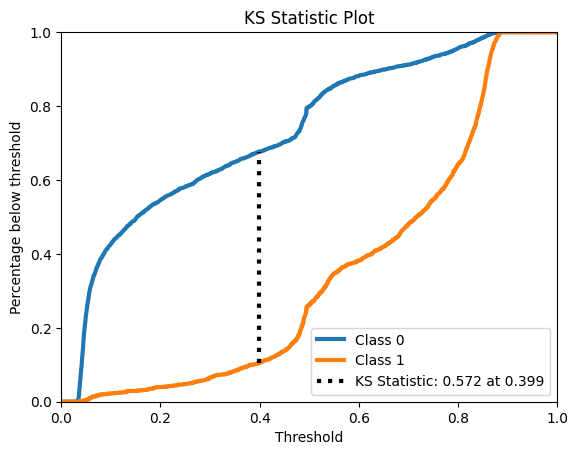

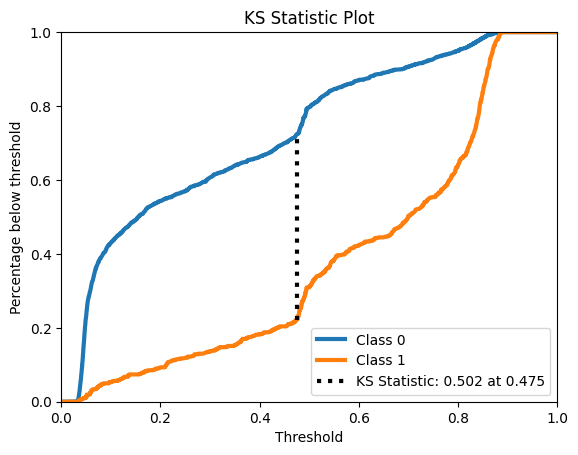

In [80]:
print('[Treinamento]')
y_pred_proba = torch.softmax(tabkanet_model(torch.Tensor([]), torch.Tensor(train_input_norm.values).to(DEVICE)), dim=1)
y_pred = torch.argmax(y_pred_proba, dim=1)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr = compute_performance_metrics(np.asarray(train_label_norm),
                                                                                                                       y_pred.cpu().numpy(),
                                                                                                                       to_np(y_pred_proba))

print_metrics_summary(tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr)

print('\n[Teste]')
y_pred_proba = torch.softmax(tabkanet_model(torch.Tensor([]), torch.Tensor(X_test2_norm.values).to(DEVICE)), dim=1)
y_pred = torch.argmax(y_pred_proba, dim=1)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr = compute_performance_metrics(np.asarray(y_test2), y_pred.cpu().numpy(), to_np(y_pred_proba))

print_metrics_summary(tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr)

<Axes: title={'center': 'TabKANet - Loss over time'}>

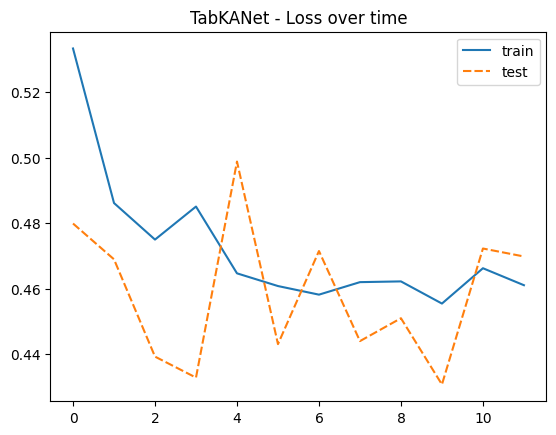

In [81]:
loss_hist = pd.DataFrame()
loss_hist['train'] = train_history
loss_hist['test'] = test_history
plt.title('TabKANet - Loss over time')
sns.lineplot(loss_hist)

In [82]:
# Definir features
#train_input = pd.concat([X_train1, X_val1], ignore_index=True)
#train_label = pd.concat([y_train1, y_val1], ignore_index=True)

train_input_norm = pd.concat([X_train3_norm, X_val1_norm], ignore_index=True)
train_label_norm = pd.concat([y_train3_norm, y_val1], ignore_index=True)

continuous_features = list(X_train3_norm.columns)
categorical_features = []
target_name = "Churn"
task = "classification"

# Criar datasets
tabkanet_train = pd.concat([train_input_norm, train_label_norm], axis=1)
#tabkanet_val = pd.concat([X_val1_norm, y_val1], axis=1)
tabkanet_test = pd.concat([X_test3_norm, y_test3], axis=1)

dataset_train, _, dataset_test = get_dataset(
        tabkanet_train, tabkanet_test, tabkanet_test, target_name, task, categorical_features, continuous_features
    )

dataloader_train, _, dataloader_test = get_data_loader(
    dataset_train, dataset_test, dataset_test, train_batch_size=32, inference_batch_size=32
)

# Calcular bins
bins = get_quantile_bins(X_train1_norm)

#mlp_hidden_dims = [tabkanet_study.best_params['mlp_hidden_layers1']]
#if(tabkanet_study.best_params['mlp_num_layers']==2):
#    mlp_hidden_dims.append(tabkanet_study.best_params['mlp_hidden_layers2'])

# Definir o modelo
tabkanet_model = TabKANet(
    output_dim=2,  # 2 classes (binário)
    vocabulary={},
    num_continuous_features=len(continuous_features),
    embedding_dim=24,#tabkanet_study.best_params['embedding_dim'],
    mlp_hidden_dims=[tabkanet_study.best_params['mlp_hidden_layers1']],#mlp_hidden_dims,
    activation=tabkanet_study.best_params['activation'],
    ffn_dropout_rate=tabkanet_study.best_params['ffn_dropout'],
    nhead=tabkanet_study.best_params['nhead'],
    num_layers=tabkanet_study.best_params['num_layers'],
    dim_feedforward=tabkanet_study.best_params['dim_feedforward'],#128,
    attn_dropout_rate=tabkanet_study.best_params['attn_dropout'],
    learninable_noise=True,
    bins=bins
)

# Definir otimizador e loss
optimizer = torch.optim.AdamW(tabkanet_model.parameters(), lr=tabkanet_study.best_params['opt-lr'],
                              weight_decay=tabkanet_study.best_params['opt-weight_decay']
                              )
criterion = torch.nn.CrossEntropyLoss()

# Treinar o modelo
train_history, _, test_history = train(
    tabkanet_model, epochs=30, train_loader=dataloader_train, val_loader=dataloader_test,
    optimizer=optimizer, criterion=criterion, test_loader=dataloader_test,
    custom_metric=f1_score_macro, maximize=True, early_stopping_patience=5, gpu_num=0, verbose=1
)

torch.save(tabkanet_model.state_dict(), 'tabkanet3.pkl')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 0, Train Loss: 0.4251, Val Loss: 0.4952,Val AUC:0.8292, Val Metric: 0.7289


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 1, Train Loss: 0.3985, Val Loss: 0.4697,Val AUC:0.8187, Val Metric: 0.7298


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 2, Train Loss: 0.5272, Val Loss: 0.4772,Val AUC:0.8227, Val Metric: 0.7141


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 3, Train Loss: 0.4559, Val Loss: 0.5226,Val AUC:0.8241, Val Metric: 0.7171


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 4, Train Loss: 0.6102, Val Loss: 0.5464,Val AUC:0.8428, Val Metric: 0.7096


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 5, Train Loss: 0.3715, Val Loss: 0.4813,Val AUC:0.8445, Val Metric: 0.7219


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 6, Train Loss: 0.3001, Val Loss: 0.4473,Val AUC:0.8440, Val Metric: 0.7321


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 7, Train Loss: 0.2284, Val Loss: 0.4168,Val AUC:0.8506, Val Metric: 0.7400


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 8, Train Loss: 0.3311, Val Loss: 0.4624,Val AUC:0.8487, Val Metric: 0.7426


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 9, Train Loss: 0.3492, Val Loss: 0.4632,Val AUC:0.8483, Val Metric: 0.7352


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 10, Train Loss: 0.2443, Val Loss: 0.4414,Val AUC:0.8467, Val Metric: 0.7373


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 11, Train Loss: 0.3249, Val Loss: 0.4358,Val AUC:0.8506, Val Metric: 0.7393


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 12, Train Loss: 0.2759, Val Loss: 0.4298,Val AUC:0.8494, Val Metric: 0.7372


<ipython-input-54-8897b3f9730b>:109: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch: 13, Train Loss: 0.2910, Val Loss: 0.4302,Val AUC:0.8514, Val Metric: 0.7352
Early stopping
FINISHED TRAINING, BEST VAL AUC:0.8514


[Treinamento]

Accuracy:         0.7773
Recall:           0.7172
Precision:        0.7287
F1:               0.7229
AUROC:            0.8624
AUPR:             0.7907

[Teste]

Accuracy:         0.7756
Recall:           0.6934
Precision:        0.5625
F1:               0.6211
AUROC:            0.8515
AUPR:             0.6560


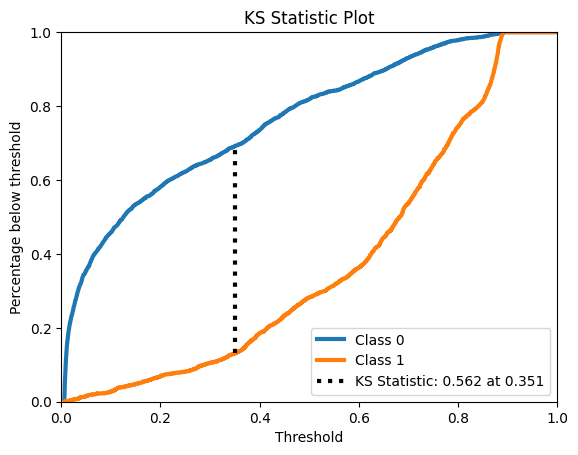

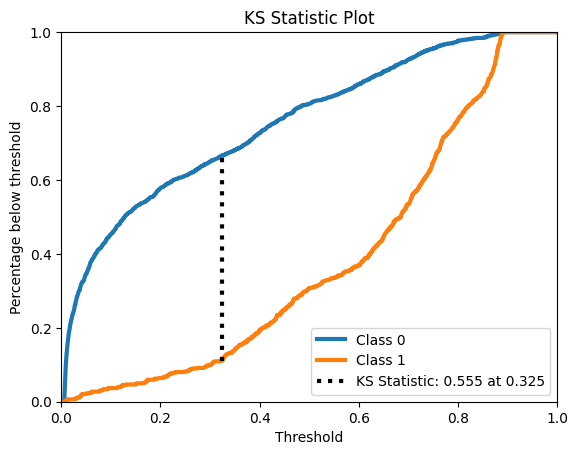

In [84]:
print('[Treinamento]')
y_pred_proba = torch.softmax(tabkanet_model(torch.Tensor([]), torch.Tensor(train_input_norm.values).to(DEVICE)), dim=1)
y_pred = torch.argmax(y_pred_proba, dim=1)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr = compute_performance_metrics(np.asarray(train_label_norm),
                                                                                                                       y_pred.cpu().numpy(),
                                                                                                                       to_np(y_pred_proba))

print_metrics_summary(tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr)

print('\n[Teste]')
y_pred_proba = torch.softmax(tabkanet_model(torch.Tensor([]), torch.Tensor(X_test3_norm.values).to(DEVICE)), dim=1)
y_pred = torch.argmax(y_pred_proba, dim=1)

# só to fazendo assim dessa vez pq treinei a kanet com a fórmula errada do f1 score. Mas se for reiniciar o ambiente e treiná-la dnv, use as métricas armazenadas direto
tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr = compute_performance_metrics(np.asarray(y_test3), y_pred.cpu().numpy(), to_np(y_pred_proba))

print_metrics_summary(tabkanet_acc, tabkanet_recall, tabkanet_prec, tabkanet_f1, tabkanet_auroc, tabkanet_aupr)

<Axes: title={'center': 'TabKANet - Loss over time'}>

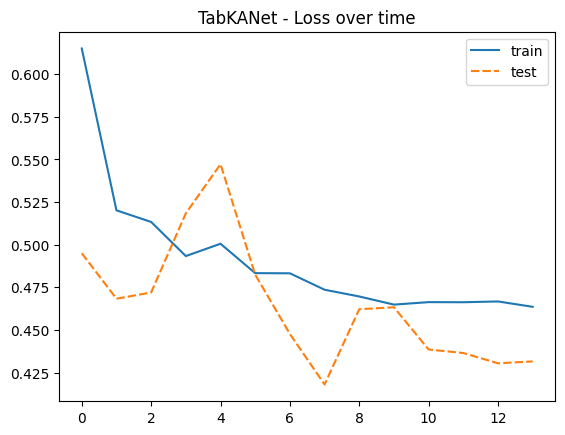

In [85]:
loss_hist = pd.DataFrame()
loss_hist['train'] = train_history
loss_hist['test'] = test_history
plt.title('TabKANet - Loss over time')
sns.lineplot(loss_hist)